In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.misc import comb
import scipy.stats as ss
from scipy.stats import beta, chisqprob
from scipy.special import gamma as gammaf # This is dumb but better for the moment than fixing code against jon's
from scipy.special import expit as logistic
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from __future__ import division

import json
from sys import maxint
from scipy.special import binom
from IPython.display import display, HTML
from sklearn.cross_validation import KFold
import community as cu

import matplotlib.patches as mpatches
import matplotlib.markers as mk
import matplotlib.colors as mcl


In [2]:
# Inline all plots to cell outputs
%matplotlib inline

In [204]:
unfiltered_sens = pd.DataFrame.from_csv("noF_LLR_p(same-library_|_truly_same-library)_evaluation.csv")
no_opticals_sens = pd.DataFrame.from_csv("optNo_LLR_p(same-library_|_truly_same-library)_evaluation.csv")
cleaned_sens = pd.DataFrame.from_csv("feb_LLR_p(same-library_|_truly_same-library)_evaluation.csv")

In [205]:
unfiltered_spec = pd.DataFrame.from_csv("noF_LLR_p(different-library_|_truly_different-library)_evaluation.csv")
no_opticals_spec = pd.DataFrame.from_csv("optNo_LLR_p(different-library_|_truly_different-library)_evaluation.csv")
cleaned_spec = pd.DataFrame.from_csv("feb_LLR_p(different-library_|_truly_different-library)_evaluation.csv")

In [80]:
# cleaned_nt_sens = cleaned_nt["LLR_p(same-library_|_truly_same-library)"]
# cleaned_nt_spec = cleaned_nt["LLR_p(different-library_|_truly_different-library)"]
cleaned_nt_sens = pd.DataFrame.from_csv("feb_LLR_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD.csv")
cleaned_nt_spec = pd.DataFrame.from_csv("feb_LLR_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD.csv")

# no_opticals_nt_sens = no_opticals_nt["LLR_p(same-library_|_truly_same-library)"]
# no_opticals_nt_spec = no_opticals_nt["LLR_p(different-library_|_truly_different-library)"]

# unfiltered_nt_sens = unfiltered_nt["LLR_p(same-library_|_truly_same-library)"]
# unfiltered_nt_spec = unfiltered_nt["LLR_p(different-library_|_truly_different-library)"]


In [2]:
# cleaned_nt_sens = cleaned_nt["LLR_p(same-library_|_truly_same-library)"]
# cleaned_nt_spec = cleaned_nt["LLR_p(different-library_|_truly_different-library)"]
cleaned_nt_sens = pd.DataFrame.from_csv("feb_LLR_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
cleaned_nt_spec = pd.DataFrame.from_csv("feb_LLR_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")

no_opticals_nt_sens = pd.DataFrame.from_csv("optNo_LLR_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
no_opticals_nt_spec = pd.DataFrame.from_csv("optNo_LLR_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")

unfiltered_nt_sens = pd.DataFrame.from_csv("noF_LLR_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
unfiltered_nt_spec = pd.DataFrame.from_csv("noF_LLR_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")


In [17]:
# print unfiltered_spec.loc['Exact Pairs Affinity']
# print no_opticals_spec.loc['Exact Pairs Affinity']
# print cleaned_sens.loc['Exact Pairs Affinity']
print cleaned_nt_spec.loc['Exact Pairs Affinity']

pcr_free           0.980903
pcr_plus           0.978632
genomes            0.993721
combined           0.968734
ice_only           1.000000
agilent_only       1.000000
exomes             1.000000
two_sense          1.000000
strand_agnostic    1.000000
rna                1.000000
Name: Exact Pairs Affinity, dtype: float64


In [18]:
# print unfiltered_spec.loc['Exact Pairs Affinity']
# print no_opticals_spec.loc['Exact Pairs Affinity']
print cleaned_nt_sens.loc['Exact Pairs Affinity']
print cleaned_nt_rati_cl_sens.loc['Exact Pairs Affinity']
print cleaned_nt_spec.loc['Exact Pairs Affinity']
print cleaned_nt_rati_cl_spec.loc['Exact Pairs Affinity']


pcr_free           0.916667
pcr_plus           0.977811
genomes            0.741857
combined           0.609275
ice_only           1.000000
agilent_only       1.000000
exomes             1.000000
two_sense          1.000000
strand_agnostic    0.994444
rna                1.000000
Name: Exact Pairs Affinity, dtype: float64
pcr_free           0.958333
pcr_plus           1.000000
genomes            0.993721
combined           0.957747
ice_only           1.000000
agilent_only       1.000000
exomes             1.000000
two_sense          1.000000
strand_agnostic    1.000000
rna                1.000000
Name: Exact Pairs Affinity, dtype: float64
pcr_free           0.980903
pcr_plus           0.978632
genomes            0.993721
combined           0.968734
ice_only           1.000000
agilent_only       1.000000
exomes             1.000000
two_sense          1.000000
strand_agnostic    1.000000
rna                1.000000
Name: Exact Pairs Affinity, dtype: float64
pcr_free           0.958333
pcr

In [3]:
distance = u'Exact Pairs Affinity'
cleaned_nt_spec = pd.DataFrame.from_csv("feb_LLR_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
cleaned_nt_sens = pd.DataFrame.from_csv("feb_LLR_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
Lsp = pd.DataFrame(cleaned_nt_spec.loc[distance])
Lse = pd.DataFrame(cleaned_nt_sens.loc[distance])

cleaned_nt_cluster_spec = pd.DataFrame.from_csv("feb_Cluster_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
cleaned_nt_cluster_sens = pd.DataFrame.from_csv("feb_Cluster_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
Csp = pd.DataFrame(cleaned_nt_cluster_spec.loc[distance])
Cse = pd.DataFrame(cleaned_nt_cluster_sens.loc[distance])

cleaned_nt_rati_cl_spec = pd.DataFrame.from_csv("feb_Ratio_Cluster_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
cleaned_nt_rati_cl_sens = pd.DataFrame.from_csv("feb_Ratio_Cluster_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
LCsp = pd.DataFrame(cleaned_nt_rati_cl_spec.loc[distance])
LCse = pd.DataFrame(cleaned_nt_rati_cl_sens.loc[distance])

In [5]:
distance = u'Exact Pairs Affinity'
# cleaned_nt_spec = pd.DataFrame.from_csv("feb_LLR_p(different-library_|_truly_different-library)_evaluation.csv")
# cleaned_nt_sens = pd.DataFrame.from_csv("feb_LLR_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD.csv")
# Lsp = pd.DataFrame(cleaned_nt_spec.loc[distance]).T
# Lse = pd.DataFrame(cleaned_nt_sens.loc[distance]).T

cleaned_cluster_spec = pd.DataFrame.from_csv("feb_Cluster_p(different-library_|_truly_different-library)_evaluation.csv")
cleaned_cluster_sens = pd.DataFrame.from_csv("feb_Cluster_p(same-library_|_truly_same-library)_evaluation.csv")
Csp = pd.DataFrame(cleaned_nt_cluster_spec.loc[distance]).T
Cse = pd.DataFrame(cleaned_nt_cluster_sens.loc[distance]).T

cleaned_rati_cl_spec = pd.DataFrame.from_csv("feb_Ratio_Cluster_p(same-library_|_truly_same-library)_evaluation.csv")
cleaned_rati_cl_sens = pd.DataFrame.from_csv("feb_Ratio_Cluster_p(different-library_|_truly_different-library)_evaluation.csv")
LCsp = pd.DataFrame(cleaned_rati_cl_spec.loc[distance]).T
LCse = pd.DataFrame(cleaned_rati_cl_sens.loc[distance]).T

In [46]:
distance = u'Exact Pairs Affinity'
no_opticals_nt_spec = pd.DataFrame.from_csv("optNo_LLR_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD.csv")
no_opticals_nt_sens = pd.DataFrame.from_csv("optNo_LLR_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD.csv")
noLsp = pd.DataFrame(no_opticals_nt_spec.loc[distance]).T
noLse = pd.DataFrame(no_opticals_nt_sens.loc[distance]).T

no_opticals_nt_cluster_spec = pd.DataFrame.from_csv("optNo_Cluster_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD.csv")
no_opticals_nt_cluster_sens = pd.DataFrame.from_csv("optNo_Cluster_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD.csv")
noCsp = pd.DataFrame(no_opticals_nt_cluster_spec.loc[distance]).T
noCse = pd.DataFrame(no_opticals_nt_cluster_sens.loc[distance]).T

no_opticals_nt_rati_cl_spec = pd.DataFrame.from_csv("optNo_Ratio_Cluster_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD.csv")
no_opticals_nt_rati_cl_sens = pd.DataFrame.from_csv("optNo_Ratio_Cluster_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD.csv")
noLCsp = pd.DataFrame(no_opticals_nt_rati_cl_spec.loc[distance]).T
noLCse = pd.DataFrame(no_opticals_nt_rati_cl_sens.loc[distance]).T

In [6]:
distance = u'Exact Pairs Affinity'
unfiltered_nt_spec = pd.DataFrame.from_csv("noF_LLR_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
unfiltered_nt_sens = pd.DataFrame.from_csv("noF_LLR_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
unfLsp = pd.DataFrame(no_opticals_nt_spec.loc[distance]).T
unfLse = pd.DataFrame(no_opticals_nt_sens.loc[distance]).T

unfiltered_nt_cluster_spec = pd.DataFrame.from_csv("noF_Cluster_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
unfiltered_nt_cluster_sens = pd.DataFrame.from_csv("noF_Cluster_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
unfCsp = pd.DataFrame(no_opticals_nt_cluster_spec.loc[distance]).T
unfCse = pd.DataFrame(no_opticals_nt_cluster_sens.loc[distance]).T

unfiltered_nt_rati_cl_spec = pd.DataFrame.from_csv("noF_Ratio_Cluster_p(same-library_|_truly_same-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
unfiltered_nt_rati_cl_sens = pd.DataFrame.from_csv("noF_Ratio_Cluster_p(different-library_|_truly_different-library)_evaluation_NEW_THRESHOLD_wFullFalses.csv")
unfLCsp = pd.DataFrame(no_opticals_nt_rati_cl_spec.loc[distance]).T
unfLCse = pd.DataFrame(no_opticals_nt_rati_cl_sens.loc[distance]).T

NameError: name 'no_opticals_nt_cluster_spec' is not defined

In [12]:
performance_table = pd.concat([Lse, Cse, LCse, Lsp, Csp, LCsp], axis=1)

In [35]:
def f2(x):
    return '%.2f' % x

In [27]:
clabels = ['Sensitivity']*3
Splabel = ['Specificity']*3
clabels.extend(Splabel)
clabels

mlabels = ['LLR Pairwise', 'Similarity Clustering', 'LLR Clustering']*2
mlabels

labels = [clabels, mlabels]
labels

performance_table.columns = labels
performance_table

Sensitivity                                       \
                LLR Pairwise Similarity Clustering LLR Clustering   
pcr_free            0.916667                   1.0       0.958333   
pcr_plus            0.977811                   1.0       1.000000   
genomes             0.741857                   1.0       0.993721   
combined            0.609275                   1.0       0.957747   
ice_only            1.000000                   1.0       1.000000   
agilent_only        1.000000                   1.0       1.000000   
exomes              1.000000                   1.0       1.000000   
two_sense           1.000000                   1.0       1.000000   
strand_agnostic     0.994444                   1.0       1.000000   
rna                 1.000000                   1.0       1.000000   

                 Specificity                                       
                LLR Pairwise Similarity Clustering LLR Clustering  
pcr_free            0.980903              1.000000       0.958333  
pcr_plus            0.978632              1.000000       1.000000  
genomes             0.993721              1.000000       0.981270  
combined            0.968734              0.924179       1.000000  
ice_only            1.000000              1.000000       1.000000  
agilent_only        1.000000              0.993236       1.000000  
exomes              1.000000              0.998492       1.000000  
two_sense           1.000000              1.000000       1.000000  
strand_agnostic     1.000000              1.000000       0.922222  
rna                 1.000000              1.000000       0.940299

In [38]:
doof = 100*performance_table
doof.to_latex("feb_overall_performance.tex", float_format=f2)

In [31]:
100*performance_table

Sensitivity                                       \
                LLR Pairwise Similarity Clustering LLR Clustering   
pcr_free           91.666667                 100.0      95.833333   
pcr_plus           97.781065                 100.0     100.000000   
genomes            74.185668                 100.0      99.372057   
combined           60.927536                 100.0      95.774709   
ice_only          100.000000                 100.0     100.000000   
agilent_only      100.000000                 100.0     100.000000   
exomes            100.000000                 100.0     100.000000   
two_sense         100.000000                 100.0     100.000000   
strand_agnostic    99.444444                 100.0     100.000000   
rna               100.000000                 100.0     100.000000   

                 Specificity                                       
                LLR Pairwise Similarity Clustering LLR Clustering  
pcr_free           98.090278            100.000000      95.833333  
pcr_plus           97.863248            100.000000     100.000000  
genomes            99.372057            100.000000      98.127036  
combined           96.873372             92.417926     100.000000  
ice_only          100.000000            100.000000     100.000000  
agilent_only      100.000000             99.323563     100.000000  
exomes            100.000000             99.849246     100.000000  
two_sense         100.000000            100.000000     100.000000  
strand_agnostic   100.000000            100.000000      92.222222  
rna               100.000000            100.000000      94.029851

(10, 1)
(10, 1)


'Look here'

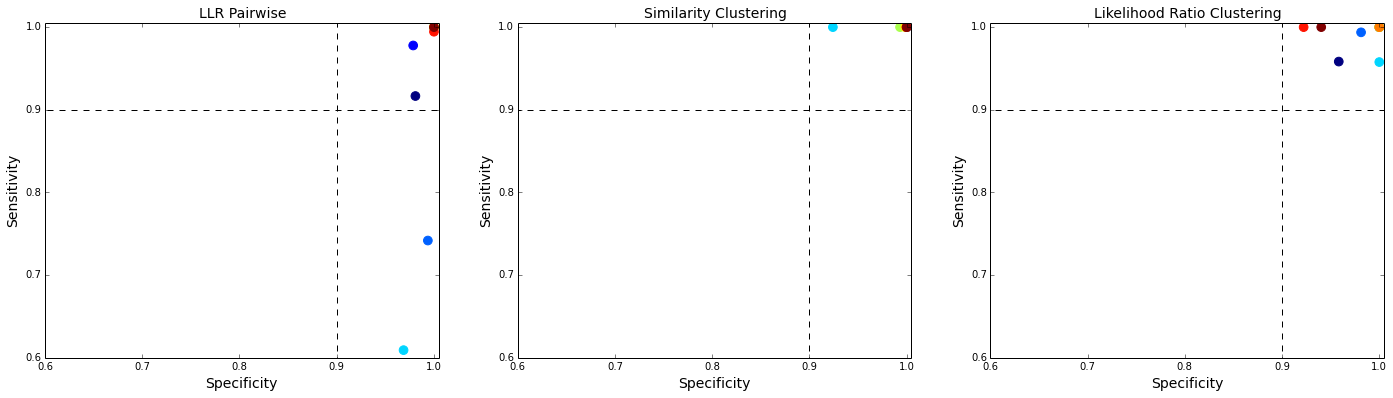

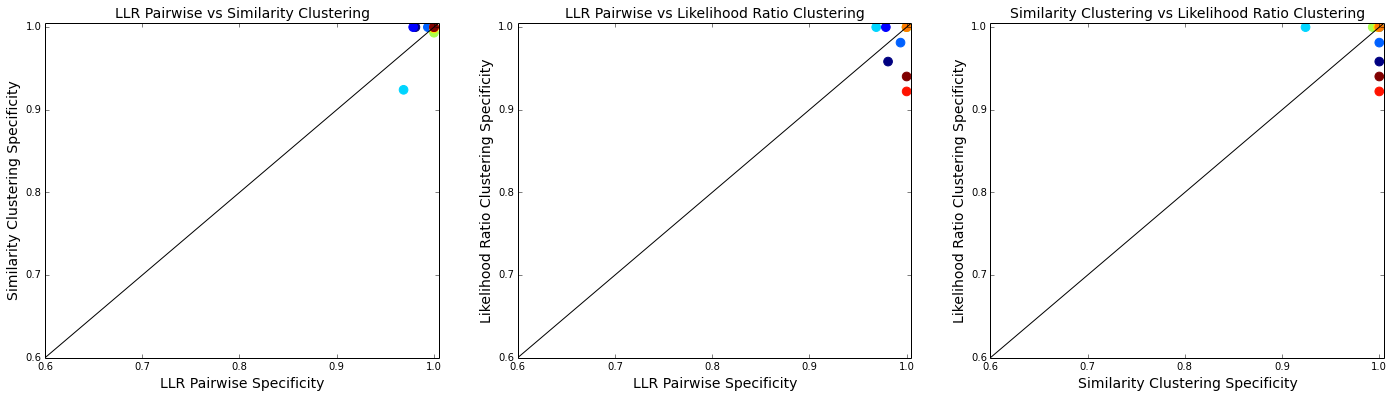

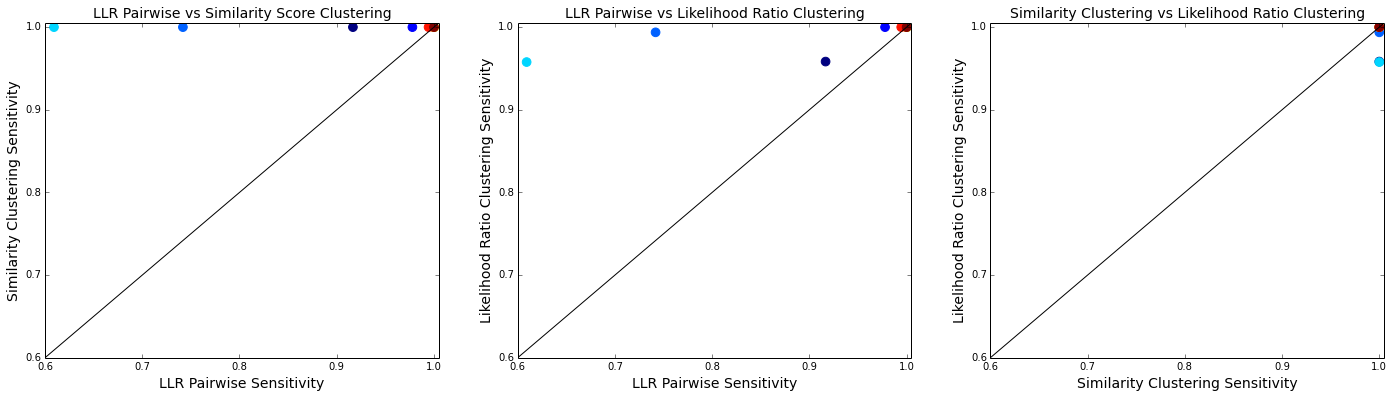

In [10]:
distance = u'Exact Pairs Affinity'

# Lsp = pd.DataFrame(cleaned_exp_spec_nt.loc[distance]).T
# Lse = pd.DataFrame(cleaned_exp_sens_nt.loc[distance]).T


# Csp = pd.DataFrame(metrics["Cluster_specificity"].loc[distance]).T
# Cse = pd.DataFrame(metrics["Cluster_sensitivity"].loc[distance]).T

# LCsp = pd.DataFrame(metrics["ratio_cluster_specificity"].loc[distance]).T
# LCse = pd.DataFrame(metrics["ratio_cluster_sensitivity"].loc[distance]).T

# Rsp = pd.DataFrame(metrics["ratio_specificity"].loc[distance]).T
# Rse = pd.DataFrame(metrics["ratio_sensitivity"].loc[distance]).T


fig = plt.figure(1, figsize=(24,6))
plot1 = fig.add_subplot(131)
plot2 = fig.add_subplot(132)
plot3 = fig.add_subplot(133)
plot_scatter2(Lsp, Lse, "Specificity", "Sensitivity", 0.6, 0.6, "LLR Pairwise", ax=plot1, display_legend=False, draw_nineties=True)
plot_scatter2(Csp, Cse, "Specificity", "Sensitivity", 0.6, 0.6,  "Similarity Clustering", ax=plot2, draw_nineties=True)
plot_scatter2(LCsp, LCse, "Specificity", "Sensitivity", 0.6, 0.6,  "Likelihood Ratio Clustering", ax=plot3, draw_nineties=True)

print Lsp.shape
print Csp.shape

fig2 = plt.figure(2, figsize=(24,6))
plot21 = fig2.add_subplot(131)
plot22 = fig2.add_subplot(132)
plot23 = fig2.add_subplot(133)
plot_scatter2(Lsp, Csp, "LLR Pairwise Specificity", "Similarity Clustering Specificity", 0.6, 0.6, "LLR Pairwise vs Similarity Clustering", ax=plot21, draw_line=True, display_legend=False)
plot_scatter2(Lsp, LCsp, "LLR Pairwise Specificity", "Likelihood Ratio Clustering Specificity", 0.6, 0.6, "LLR Pairwise vs Likelihood Ratio Clustering", ax=plot22, draw_line=True, display_legend=False)
plot_scatter2(Csp, LCsp, "Similarity Clustering Specificity", "Likelihood Ratio Clustering Specificity", 0.6, 0.6, "Similarity Clustering vs Likelihood Ratio Clustering", ax=plot23, draw_line=True, display_legend=False)


fig3 = plt.figure(3, figsize=(24,6))
plot31 = fig3.add_subplot(131)
plot32 = fig3.add_subplot(132)
plot33 = fig3.add_subplot(133)
plot_scatter2(Lse, Cse, "LLR Pairwise Sensitivity", "Similarity Clustering Sensitivity", 0.6, 0.6,  "LLR Pairwise vs Similarity Score Clustering", ax=plot31, draw_line=True, display_legend=False)
plot_scatter2(Lse, LCse, "LLR Pairwise Sensitivity", "Likelihood Ratio Clustering Sensitivity", 0.6, 0.6,  "LLR Pairwise vs Likelihood Ratio Clustering", ax=plot32, draw_line=True, display_legend=False)
plot_scatter2(Cse, LCse, "Similarity Clustering Sensitivity", "Likelihood Ratio Clustering Sensitivity", 0.6, 0.6,  "Similarity Clustering vs Likelihood Ratio Clustering", ax=plot33, draw_line=True, display_legend=False)

"Look here"
# plot_scatter(metrics["LLR_sensitivity"], metrics["Cluster_sensitivity"], "Pairwise Sensitivity", "Clustering Sensitivity", "Pairwise vs Clustering Specificity by Dataset", ax=plot22, draw_line=True)

In [11]:
make_performance_figure("Exact Pairs Affinity", cleaned_nt_rati_cl_sens, cleaned_nt_rati_cl_spec)

NameError: name 'make_performance_figure' is not defined

In [72]:
make_performance_figure("Exact Pairs Affinity", cleaned_nt_cluster_sens, cleaned_nt_cluster_spec)

NameError: name 'cleaned_nt_cluster_sens' is not defined

In [74]:
cleaned_nt_cluster_sens

,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cosine Similarity,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Exact Pairs Affinity,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Five limited Affinity,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Four limited Affinity,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Jaccard Similarity Index,1.0,0.961538,0.978827,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Random Pairs Affinity,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Ten limited Affinity,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Three limited Affinity,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [75]:
cleaned_nt_cluster_spec

,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,1.0,1.000000,0.667190,0.878192,1.0,0.993236,0.888442,0.555556,0.000000,0.559140
Cosine Similarity,1.0,1.000000,0.667190,0.853830,1.0,1.000000,0.975879,0.555556,0.000000,0.559140
Exact Pairs Affinity,1.0,1.000000,1.000000,0.924179,1.0,0.993236,0.998492,1.000000,1.000000,1.000000
Five limited Affinity,1.0,1.000000,1.000000,0.880884,1.0,0.993236,0.990955,1.000000,1.000000,0.978495
Four limited Affinity,1.0,1.000000,1.000000,0.885053,1.0,0.993236,0.990955,1.000000,1.000000,0.978495
Jaccard Similarity Index,1.0,0.962963,0.660387,0.853830,1.0,1.000000,0.998492,0.777778,0.666667,0.559140
Random Pairs Affinity,1.0,1.000000,1.000000,0.880884,1.0,0.993236,0.998492,1.000000,1.000000,0.978495
Ten limited Affinity,1.0,1.000000,1.000000,0.880884,1.0,0.993236,0.990955,1.000000,1.000000,0.559140
Three limited Affinity,1.0,1.000000,1.000000,0.901772,1.0,0.993236,0.998492,1.000000,1.000000,1.000000


In [83]:

Cse


,Exact Pairs Affinity
pcr_free,1.0
pcr_plus,1.0
genomes,1.0
combined,1.0
ice_only,1.0
agilent_only,1.0
exomes,1.0
two_sense,1.0
strand_agnostic,1.0
rna,1.0


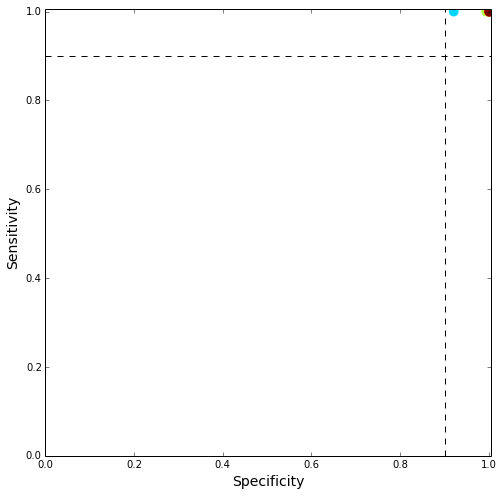

In [47]:
make_performance_figure("Exact Pairs Affinity", no_opticals_nt_cluster_sens, no_opticals_nt_cluster_spec)

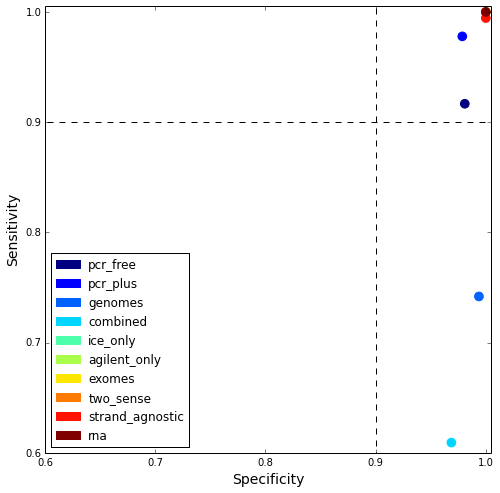

In [6]:
make_performance_figure("Exact Pairs Affinity", cleaned_nt_sens, cleaned_nt_spec)

In [27]:
make_performance_figure("Exact Pairs Affinity", no_opticals_nt_sens, no_opticals_nt_spec)

NameError: name 'no_opticals_nt_sens' is not defined

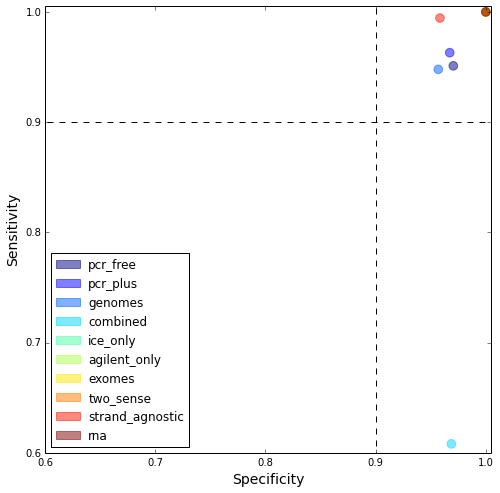

In [25]:
make_performance_figure("Exact Pairs Affinity", no_opticals_sens, no_opticals_spec)

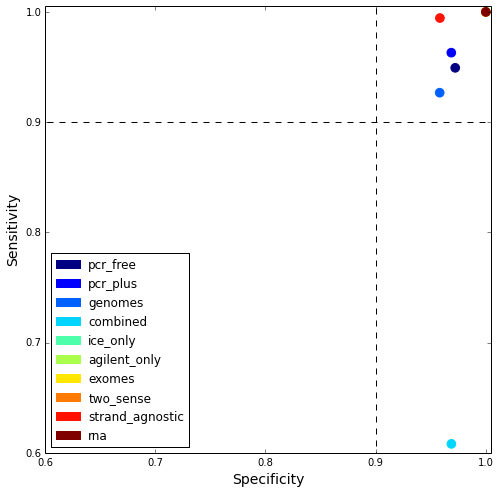

In [365]:
make_performance_figure("Exact Pairs Affinity", cleaned_sens, cleaned_spec)

In [24]:
make_performance_figure("Exact Pairs Affinity", no_opticals)

NameError: name 'no_opticals' is not defined

In [ ]:
make_performance_figure("Exact Pairs Affinity", unfiltered)

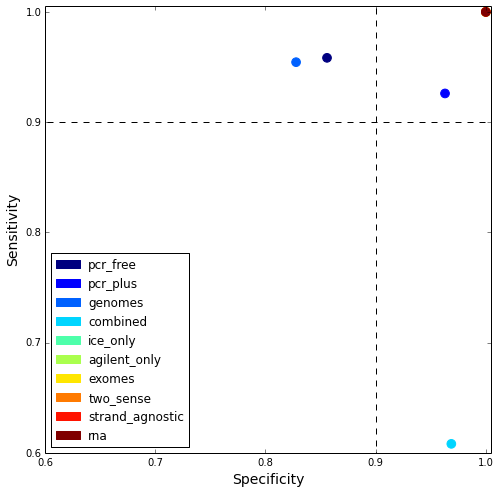

In [333]:
make_performance_figure("Exact Pairs Affinity", unfiltered_sens, unfiltered_spec)

In [5]:
def make_performance_figure(distance, LLR_sens, LLR_spec, title=None):
    fig = plt.figure(1, figsize=(8,8))
    plot1 = fig.gca()
    
#     print LLR_spec
    
    LLR_spec = pd.DataFrame(LLR_spec.loc[distance])
    LLR_sens = pd.DataFrame(LLR_sens.loc[distance])
    
#     LLR_spec = pd.DataFrame(data['LLR_p(different-library_|_truly_different-library)'].loc[distance])
#     LLR_sens = pd.DataFrame(data['LLR_p(same-library_|_truly_same-library)'].loc[distance])
#     LLR_rand = cleaned['LLR_rand_index']
    plot_scatter2(LLR_spec, LLR_sens, "Specificity", "Sensitivity", 0.6, 0.6, title, ax=plot1, draw_nineties=True, display_legend=True)


In [ ]:
LLR_sens

In [ ]:
pd.DataFrame(cleaned['LLR_p(same-library_|_truly_same-library)'])

In [4]:
import matplotlib.patches as mpatches
import matplotlib.markers as mk
import matplotlib.colors as mcl

def plot_scatter2(x_df, y_df, x_label, y_label, x_min, y_min, title=None, ax=None, draw_line=False, display_legend=False, draw_nineties=False):
    al = 1
    marker_size = 75
    font_size = 14
    
    if x_df.shape != y_df.shape:
        raise AssertionError("Attempting to create scatterplot from two dataframes with different shape")
    
    if ax is None:
        ax = plt.gca()
    
    rows = range(len(x_df.index))
    for i in xrange(len(x_df.columns)):
        dataset_key = x_df.columns[i]
        ax.scatter(x=x_df[dataset_key], y=y_df[dataset_key], c=rows, s=marker_size, marker=mk.MarkerStyle.filled_markers[i], edgecolors='face', label=dataset_key, alpha=al)
    
    if draw_line:
        ax.plot([0,1.1], [0,1.1], c='k')
        
    if draw_nineties:
        ax.plot([0.9,0.9], [0, 1.1], c='k', linestyle='--')
        ax.plot([0, 1.1], [0.9,0.9], c='k', linestyle='--')

        
#     ax.set_ylim(ymin=y_min, ymax=1.005)
#     ax.set_xlim(xmin=x_min, xmax=1.005)
    ax.set_ylim(ymin=y_min, ymax=1.005)
    ax.set_xlim(xmin=x_min, xmax=1.005)
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    
    
    
    if title is not None:
        ax.set_title(title, fontsize=font_size)
    
    if display_legend:
        # Set up an extra set of handles/labels within the legend, for the color key
        cmap = plt.cm.get_cmap()
        norm = mcl.Normalize(vmin=0,vmax=rows[-1])
        patches = []
        for i in rows:
            patches.append(mpatches.Patch(color=cmap(norm(i)), alpha=al))
        handles, labels = ax.get_legend_handles_labels()
#         new_handle = [handle for i,handle in enumerate(handles)]+patches
#         new_label = [label for i,label in enumerate(labels)]+[dist for dist in x_df.index]

        new_handle = patches
        new_label= [dist for dist in x_df.index]

        # display the legend
        ax.legend(new_handle, new_label, loc=3)
#         ax.legend(new_handle, new_label, ncol=2, bbox_to_anchor=(4.3,1.01))


    


In [118]:
cleaned_exp_false_diffs = cleaned['Expected_False-Diffs']
# display(cleaned_exp_false_diffs)
cleaned_expected_spec = pd.DataFrame(1 - cleaned_exp_false_diffs.values, index=cleaned_exp_false_diffs.index, columns=cleaned_exp_false_diffs.columns)


,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,0.015127,0.069927,0.763347,0.843318,6.113612e-05,0.009508,0.054031,4.112862e-10,0.003656,0.409231
Cosine Similarity,0.248601,0.474711,0.973659,0.588508,4.153927e-34,0.094223,0.141826,1.229399e-03,0.015277,0.148487
Exact Pairs Affinity,0.018349,0.001518,0.006972,0.272450,4.028389e-05,0.012487,0.053266,2.143303e-05,0.042451,0.017869
Five limited Affinity,0.176645,0.037723,0.247438,0.314531,5.598122e-04,0.008374,0.052924,2.787605e-14,0.024272,0.028912
Four limited Affinity,0.109098,0.010972,0.016798,0.304602,3.735936e-05,0.001024,0.054855,1.959359e-07,0.026095,0.026584
Jaccard Similarity Index,0.443656,0.247490,0.567813,0.428495,6.722546e-06,0.043431,0.061758,1.000000e+00,0.002178,0.997450
Random Pairs Affinity,0.141793,0.008672,0.119839,0.356924,1.138579e-03,0.010199,0.066711,3.241407e-02,0.029960,0.045338
Ten limited Affinity,0.482894,0.224500,0.683436,0.372715,2.207671e-19,0.008750,0.050463,2.990118e-06,0.030225,0.038903
Three limited Affinity,0.109004,0.004612,0.008969,0.324447,3.904937e-04,0.012721,0.018547,9.794177e-08,0.018424,0.025326


In [122]:
cleaned_exp_false_sames = cleaned['Expected_False-Sames']
display(cleaned_exp_false_sames)
cleaned_expected_sens = pd.DataFrame(1 - cleaned_exp_false_sames.values, index=cleaned_exp_false_sames.index, columns=cleaned_exp_false_sames.columns)
display(cleaned_expected_sens)

,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,0.000851,3.041599e-02,5.443889e-03,0.000004,1.366440e-11,1.110223e-16,1.236247e-02,5.567856e-03,1.000000,0.031561
Cosine Similarity,0.969721,6.345563e-04,2.338247e-07,0.088500,4.440892e-16,1.312695e-04,9.958665e-02,1.109314e-02,0.994135,0.119183
Exact Pairs Affinity,0.021406,1.476976e-02,4.563811e-02,0.013956,1.110223e-16,1.110223e-16,1.003078e-06,1.110223e-16,0.036890,0.087032
Five limited Affinity,0.171498,4.493778e-02,1.984548e-02,0.017846,1.110223e-16,1.110223e-16,2.177980e-04,1.110223e-16,0.973950,0.160229
Four limited Affinity,0.149896,4.589159e-02,2.757643e-01,0.016654,1.110223e-16,1.110223e-16,7.095538e-05,1.110223e-16,0.079513,0.141245
Jaccard Similarity Index,0.026901,3.267829e-07,1.531609e-02,0.226180,1.110223e-16,2.001824e-06,1.390329e-01,4.131795e-11,0.998055,0.010818
Random Pairs Affinity,0.053815,3.266414e-02,1.031751e-02,0.004527,1.110223e-16,1.110223e-16,1.768689e-04,1.110223e-16,0.984041,0.104591
Ten limited Affinity,0.147903,5.532968e-02,1.603143e-02,0.010037,1.110223e-16,1.110223e-16,2.215789e-03,1.110223e-16,0.987629,0.198231
Three limited Affinity,0.064338,3.407973e-02,1.698729e-01,0.007081,1.110223e-16,1.110223e-16,9.354998e-07,1.110223e-16,0.955660,0.038310


,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,0.999149,0.969584,0.994556,0.999996,1.0,1.000000,0.987638,0.994432,1.066288e-07,0.968439
Cosine Similarity,0.030279,0.999365,1.000000,0.911500,1.0,0.999869,0.900413,0.988907,5.864884e-03,0.880817
Exact Pairs Affinity,0.978594,0.985230,0.954362,0.986044,1.0,1.000000,0.999999,1.000000,9.631102e-01,0.912968
Five limited Affinity,0.828502,0.955062,0.980155,0.982154,1.0,1.000000,0.999782,1.000000,2.605040e-02,0.839771
Four limited Affinity,0.850104,0.954108,0.724236,0.983346,1.0,1.000000,0.999929,1.000000,9.204865e-01,0.858755
Jaccard Similarity Index,0.973099,1.000000,0.984684,0.773820,1.0,0.999998,0.860967,1.000000,1.944716e-03,0.989182
Random Pairs Affinity,0.946185,0.967336,0.989682,0.995473,1.0,1.000000,0.999823,1.000000,1.595908e-02,0.895409
Ten limited Affinity,0.852097,0.944670,0.983969,0.989963,1.0,1.000000,0.997784,1.000000,1.237071e-02,0.801769
Three limited Affinity,0.935662,0.965920,0.830127,0.992919,1.0,1.000000,0.999999,1.000000,4.434046e-02,0.961690


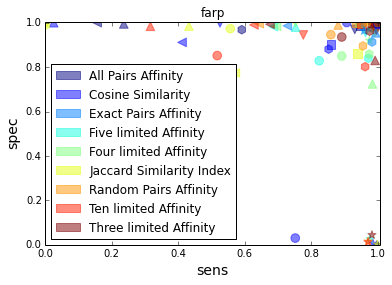

In [136]:
# ax=plt.gca()
# y_df = cleaned_expected_sens
# x_df = cleaned_expected_spec


# marker_size=75
# al=0.5
# ax.scatter(x=x_df, y=y_df, c=rows, s=marker_size, marker=mk.MarkerStyle.filled_markers[i], edgecolors='face', label='farp', alpha=al)
plot_scatter2(cleaned_expected_spec, cleaned_expected_sens, "sens", 'spec', 0, 0, 'farp', display_legend=True)

In [138]:
cleaned_expected_sens["pcr_free"]

All Pairs Affinity          0.999149
Cosine Similarity           0.030279
Exact Pairs Affinity        0.978594
Five limited Affinity       0.828502
Four limited Affinity       0.850104
Jaccard Similarity Index    0.973099
Random Pairs Affinity       0.946185
Ten limited Affinity        0.852097
Three limited Affinity      0.935662
Name: pcr_free, dtype: float64

In [161]:
def expected_fails_to_successses(expected_fails):
    return pd.DataFrame(1 - expected_fails.values, index=expected_fails.index, columns=expected_fails.columns)

In [2]:
cleaned_exp_sens=expected_fails_to_successses(cleaned['Expected_False-Sames'])
no_opticals_exp_sens=expected_fails_to_successses(no_opticals['Expected_False-Sames'])
unfiltered_exp_sens=expected_fails_to_successses(unfiltered['Expected_False-Sames'])

NameError: name 'cleaned' is not defined

In [3]:
"FALSE SENSES FRIG"

# cleaned_exp_sens_nt=expected_fails_to_successses(pd.DataFrame.from_csv('feb_Expected_False-Sames_evaluation_NEW_THRESHOLD.csv'))
# cleaned_exp_spec_nt=expected_fails_to_successses(pd.DataFrame.from_csv('feb_Expected_False-Diffs_evaluation_NEW_THRESHOLD.csv'))
cleaned_exp_sens_nt=pd.DataFrame.from_csv('feb_Expected_False-Sames_evaluation_NEW_THRESHOLD_wFullFalses.csv')
cleaned_exp_spec_nt=pd.DataFrame.from_csv('feb_Expected_False-Diffs_evaluation_NEW_THRESHOLD_wFullFalses.csv')

# no_opticals_exp_sens_nt=expected_fails_to_successses(pd.DataFrame.from_csv('optNo_Expected_False-Sames_evaluation_NEW_THRESHOLD.csv'))
# no_opticals_exp_spec_nt=expected_fails_to_successses(pd.DataFrame.from_csv('optNo_Expected_False-Diffs_evaluation_NEW_THRESHOLD.csv'))
no_opticals_exp_sens_nt=pd.DataFrame.from_csv('optNo_Expected_False-Sames_evaluation_NEW_THRESHOLD_wFullFalses.csv')
no_opticals_exp_spec_nt=pd.DataFrame.from_csv('optNo_Expected_False-Diffs_evaluation_NEW_THRESHOLD_wFullFalses.csv')

# unfiltered_exp_sens_nt=expected_fails_to_successses(pd.DataFrame.from_csv('noF_Expected_False-Sames_evaluation_NEW_THRESHOLD.csv'))
# unfiltered_exp_spec_nt=expected_fails_to_successses(pd.DataFrame.from_csv('noF_Expected_False-Diffs_evaluation_NEW_THRESHOLD.csv'))
unfiltered_exp_sens_nt=pd.DataFrame.from_csv('noF_Expected_False-Sames_evaluation_NEW_THRESHOLD_wFullFalses.csv')
unfiltered_exp_spec_nt=pd.DataFrame.from_csv('noF_Expected_False-Diffs_evaluation_NEW_THRESHOLD_wFullFalses.csv')

In [177]:
cleaned_exp_fals_same = pd.DataFrame.from_csv('feb_Expected_False-Sames_evaluation.csv')
cleaned_exp_sens=expected_fails_to_successses(pd.DataFrame.from_csv('feb_Expected_False-Sames_evaluation.csv'))

In [173]:
cleaned_exp_sens=expected_fails_to_successses(pd.DataFrame.from_csv('feb_Expected_False-Sames_evaluation.csv'))
unfiltered_exp_sens=expected_fails_to_successses(pd.DataFrame.from_csv('noF_Expected_False-Sames_evaluation.csv'))
no_opticals_exp_sens=expected_fails_to_successses(pd.DataFrame.from_csv('optNo_Expected_False-Sames_evaluation.csv'))

In [174]:
cleaned_exp_spec=expected_fails_to_successses(pd.DataFrame.from_csv('feb_Expected_False-Diffs_evaluation.csv'))
unfiltered_exp_spec=expected_fails_to_successses(pd.DataFrame.from_csv('noF_Expected_False-Diffs_evaluation.csv'))
no_opticals_exp_spec=expected_fails_to_successses(pd.DataFrame.from_csv('optNo_Expected_False-Diffs_evaluation.csv'))

In [384]:
cleaned_rand=pd.DataFrame.from_csv('feb_LLR_rand_index_evaluation.csv')


In [178]:
display(cleaned_exp_fals_same)
display(cleaned_exp_sens)

,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,0.000851,3.041599e-02,5.443889e-03,0.000004,1.366440e-11,1.110223e-16,1.236247e-02,5.567856e-03,1.000000,0.031561
Cosine Similarity,0.969721,6.345563e-04,2.338247e-07,0.088500,4.440892e-16,1.312695e-04,9.958665e-02,1.109314e-02,0.994135,0.119183
Exact Pairs Affinity,0.021406,1.476976e-02,4.563811e-02,0.013956,1.110223e-16,1.110223e-16,1.003078e-06,1.110223e-16,0.036890,0.087032
Five limited Affinity,0.171498,4.493778e-02,1.984548e-02,0.017846,1.110223e-16,1.110223e-16,2.177980e-04,1.110223e-16,0.973950,0.160229
Four limited Affinity,0.149896,4.589159e-02,2.757643e-01,0.016654,1.110223e-16,1.110223e-16,7.095538e-05,1.110223e-16,0.079513,0.141245
Jaccard Similarity Index,0.026901,3.267829e-07,1.531609e-02,0.226180,1.110223e-16,2.001824e-06,1.390329e-01,4.131795e-11,0.998055,0.010818
Random Pairs Affinity,0.053815,3.266414e-02,1.031751e-02,0.004527,1.110223e-16,1.110223e-16,1.768689e-04,1.110223e-16,0.984041,0.104591
Ten limited Affinity,0.147903,5.532968e-02,1.603143e-02,0.010037,1.110223e-16,1.110223e-16,2.215789e-03,1.110223e-16,0.987629,0.198231
Three limited Affinity,0.064338,3.407973e-02,1.698729e-01,0.007081,1.110223e-16,1.110223e-16,9.354998e-07,1.110223e-16,0.955660,0.038310


,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,0.999149,0.969584,0.994556,0.999996,1.0,1.000000,0.987638,0.994432,1.066290e-07,0.968439
Cosine Similarity,0.030279,0.999365,1.000000,0.911500,1.0,0.999869,0.900413,0.988907,5.864884e-03,0.880817
Exact Pairs Affinity,0.978594,0.985230,0.954362,0.986044,1.0,1.000000,0.999999,1.000000,9.631102e-01,0.912968
Five limited Affinity,0.828502,0.955062,0.980155,0.982154,1.0,1.000000,0.999782,1.000000,2.605040e-02,0.839771
Four limited Affinity,0.850104,0.954108,0.724236,0.983346,1.0,1.000000,0.999929,1.000000,9.204865e-01,0.858755
Jaccard Similarity Index,0.973099,1.000000,0.984684,0.773820,1.0,0.999998,0.860967,1.000000,1.944716e-03,0.989182
Random Pairs Affinity,0.946185,0.967336,0.989682,0.995473,1.0,1.000000,0.999823,1.000000,1.595908e-02,0.895409
Ten limited Affinity,0.852097,0.944670,0.983969,0.989963,1.0,1.000000,0.997784,1.000000,1.237071e-02,0.801769
Three limited Affinity,0.935662,0.965920,0.830127,0.992919,1.0,1.000000,0.999999,1.000000,4.434046e-02,0.961690


In [146]:
x_val = np.zeros(len(cleaned_exp_sens.index))

In [7]:
def box_plot_a_dataset(left, middle, right, dset, labels, ax=None):

    rows = range(len(cleaned_exp_sens.index))
#     print rows

    if ax is None:
        ax= plt.gca()
    # ax.scatter(x=x_val, y=unfiltered_exp_sens["pcr_free"], c=rows)
    # ax.scatter(x=x_val+1, y=no_opticals_exp_sens["pcr_free"], c=rows)
    # ax.scatter(x=x_val+2, y=cleaned_exp_sens["pcr_free"], c=rows)

    bp = ax.boxplot([left[dset], middle[dset], right[dset]])
    ax.set_xticklabels(labels)
    ax.set_title(dset)

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
    #     box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)

In [356]:
labs = ['Unfiltered', 'Filtered', 'No Opticals']

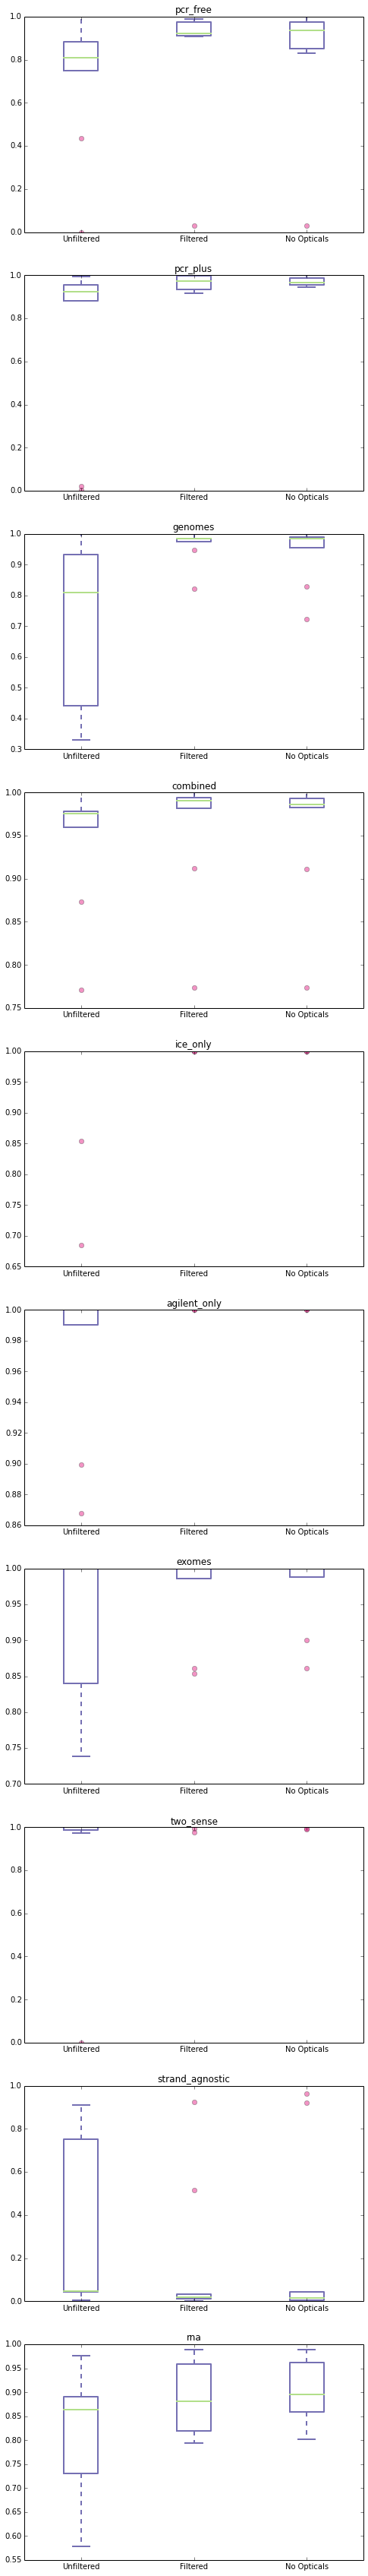

In [236]:
datasets = unfiltered_exp_sens.columns

n_subfigs = len(datasets)
# print n_subfigs
fig = plt.figure(figsize=(8, 6*n_subfigs))

i=0
for dset in datasets:
    i += 1
    sub= fig.add_subplot(n_subfigs, 1, i)
#     print dset

    box_plot_a_dataset(unfiltered_exp_sens, no_opticals_exp_sens, cleaned_exp_sens, dset, labs, ax=sub)

In [57]:
unf

,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,9.992608e-01,0.994311,1.000000,0.104954,2.048739e-01,1.005384e-01,2.173360e-01,1.000000e+00,9.821957e-01,0.296680
All Pairs Affinity,1.000000e+00,0.994662,1.000000,0.077965,1.458138e-01,9.998790e-01,2.032129e-01,2.114133e-03,9.801288e-01,0.243738
All Pairs Affinity,9.990112e-01,0.992702,1.000000,0.108146,1.856693e-01,9.999791e-01,2.314802e-01,1.996376e-03,9.812703e-01,0.115282
All Pairs Affinity,9.979382e-01,0.991920,0.000669,0.110512,1.387097e-01,3.888241e-02,2.809987e-01,1.334558e-03,9.960560e-01,0.127990
All Pairs Affinity,9.975295e-01,0.991166,0.145914,0.082095,1.484075e-01,1.000000e+00,2.335867e-01,5.048473e-04,9.999999e-01,0.041560
Jaccard Similarity Index,9.958884e-07,0.033000,0.552688,0.000003,1.110223e-16,2.389102e-02,3.121064e-02,1.110223e-16,1.948581e-01,0.330640
Jaccard Similarity Index,1.465493e-07,0.027694,0.999004,0.200005,1.110223e-16,9.662055e-03,3.153688e-02,5.547863e-03,1.645854e-01,0.290880
Jaccard Similarity Index,1.000000e+00,0.005822,0.000374,0.000004,1.110223e-16,9.503360e-03,1.603400e-01,7.796818e-03,2.632459e-01,0.191661
Jaccard Similarity Index,2.538641e-06,0.000049,0.000022,0.068970,1.110223e-16,6.830304e-03,2.557017e-01,6.707144e-03,1.110223e-16,0.181092
Jaccard Similarity Index,6.994556e-08,0.001101,0.000007,0.016044,3.826673e-08,4.615399e-03,1.497458e-11,2.788503e-10,2.659650e-01,0.101477


In [58]:
unf.loc["Exact Pairs Affinity"]

,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
Exact Pairs Affinity,0.014874,0.006226,0.043921,0.016108,1.110223e-16,1.110223e-16,9.818089e-06,1.110223e-16,4.736551e-03,0.013830
Exact Pairs Affinity,0.015873,0.005892,0.047174,0.011120,1.110223e-16,1.110223e-16,3.568482e-06,1.110223e-16,6.652154e-03,0.020144
Exact Pairs Affinity,0.029136,0.000724,0.056800,0.020204,1.110223e-16,1.110223e-16,1.498348e-07,1.110223e-16,4.843307e-03,0.010976
Exact Pairs Affinity,0.031814,0.009998,0.047952,0.004716,1.110223e-16,1.110223e-16,1.711566e-07,1.110223e-16,5.412325e-04,0.003288
Exact Pairs Affinity,0.031799,0.002109,0.026197,0.003856,1.110223e-16,1.110223e-16,1.265114e-07,1.110223e-16,1.263714e-07,0.000452


In [170]:
# np.log(unf.values.clip(10^(-12), 1-10^(-12)))
np.log(unf.values.clip(10**(-4), 1-10**(-4)))

# 1**(-12)

array([[ -2.87627499e-01,  -5.51724043e+00,  -2.12081552e-01,
         -1.35117340e-01,  -1.57606119e-01,  -1.05958910e-01,
         -2.63289017e-01,  -9.21034037e+00,  -3.12155495e+00,
         -3.13772107e-01],
       [ -8.30894244e-01,  -3.89631994e+00,  -8.17724617e-01,
         -2.59481010e-01,  -3.78551949e-01,  -1.41489195e-01,
         -3.03275339e-01,  -2.92340592e-02,  -3.07314392e+00,
         -1.45981192e-01],
       [ -1.25669558e-01,  -3.94947759e-02,  -5.38732177e-01,
         -1.62392969e-02,  -1.00005000e-04,  -1.00005000e-04,
         -1.00005000e-04,  -1.00005000e-04,  -9.54405120e-02,
         -7.78066542e-02],
       [ -9.21034037e+00,  -8.62719590e-02,  -1.10368735e+00,
         -2.70891731e-02,  -1.00005000e-04,  -1.00005000e-04,
         -5.10953190e-04,  -1.00005000e-04,  -2.34510055e-01,
         -1.74168137e-01],
       [ -2.25584630e-01,  -8.13020449e-02,  -7.72507879e-02,
         -2.43823902e-02,  -1.00005000e-04,  -1.00005000e-04,
         -3.66663926e-04

In [136]:
cleaned_exp_sens['agilent_only']

All Pairs Affinity          1.000000
Cosine Similarity           0.999869
Exact Pairs Affinity        1.000000
Five limited Affinity       1.000000
Four limited Affinity       1.000000
Jaccard Similarity Index    0.999998
Random Pairs Affinity       1.000000
Ten limited Affinity        1.000000
Three limited Affinity      1.000000
Name: agilent_only, dtype: float64

In [34]:
# jitter = np.random.normal(0, 0.05, len(fil_offsets))
jitter

array([ 0.06080231,  0.03671971,  0.08456916,  0.18699759, -0.30435339,
       -0.00540047, -0.20146119,  0.51879563,  0.14670142,  0.52006992])

In [51]:
jitter = np.column_stack(np.random.normal(0, 0.5, len(unf.index))).T
jitter
# np.column_stack(jitter).T /

array([[ 0.50920562],
       [ 0.44809781],
       [ 0.11844035],
       [ 0.96930317],
       [-0.72950512],
       [ 0.06291659],
       [-0.4141448 ],
       [-0.68123429],
       [ 1.02847045]])

In [53]:
unf_x

[array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]),
 array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]),
 array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]),
 array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]),
 array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]),
 array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]),
 array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]),
 array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]),
 array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37])]

In [52]:
unf_x + jitter

array([[  1.50920562,   5.50920562,   9.50920562,  13.50920562,
         17.50920562,  21.50920562,  25.50920562,  29.50920562,
         33.50920562,  37.50920562],
       [  1.44809781,   5.44809781,   9.44809781,  13.44809781,
         17.44809781,  21.44809781,  25.44809781,  29.44809781,
         33.44809781,  37.44809781],
       [  1.11844035,   5.11844035,   9.11844035,  13.11844035,
         17.11844035,  21.11844035,  25.11844035,  29.11844035,
         33.11844035,  37.11844035],
       [  1.96930317,   5.96930317,   9.96930317,  13.96930317,
         17.96930317,  21.96930317,  25.96930317,  29.96930317,
         33.96930317,  37.96930317],
       [  0.27049488,   4.27049488,   8.27049488,  12.27049488,
         16.27049488,  20.27049488,  24.27049488,  28.27049488,
         32.27049488,  36.27049488],
       [  1.06291659,   5.06291659,   9.06291659,  13.06291659,
         17.06291659,  21.06291659,  25.06291659,  29.06291659,
         33.06291659,  37.06291659],
       [  

In [20]:
fil_offsets

array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38])

In [27]:
fil_offsets + jitter

array([  2.05358082,   5.98489554,  10.01204992,  13.72417809,
        18.05925331,  21.89545342,  25.92197195,  30.04393281,
        34.1369036 ,  38.14341912])

In [333]:
fil_offsets

array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38])

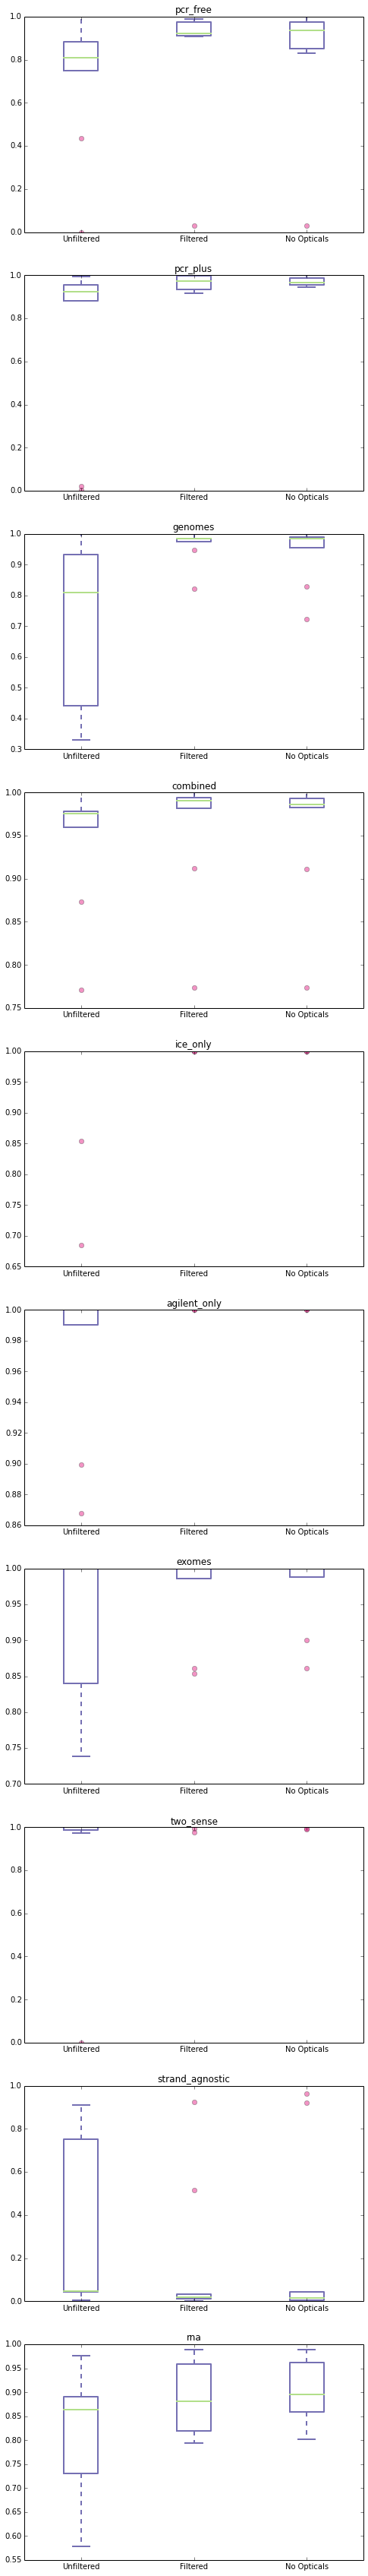

In [207]:
datasets = unfiltered_exp_sens.columns

n_subfigs = len(datasets)
# print n_subfigs
fig = plt.figure(figsize=(8, 6*n_subfigs))

i=0
for dset in datasets:
    i += 1
    sub= fig.add_subplot(n_subfigs, 1, i)
#     print dset

    box_plot_a_dataset(unfiltered_exp_sens, no_opticals_exp_sens, cleaned_exp_sens, dset, labs, ax=sub)

Index([u'All Pairs Affinity', u'Cosine Similarity', u'Exact Pairs Affinity',
       u'Five limited Affinity', u'Four limited Affinity',
       u'Jaccard Similarity Index', u'Random Pairs Affinity',
       u'Ten limited Affinity', u'Three limited Affinity'],
      dtype='object')


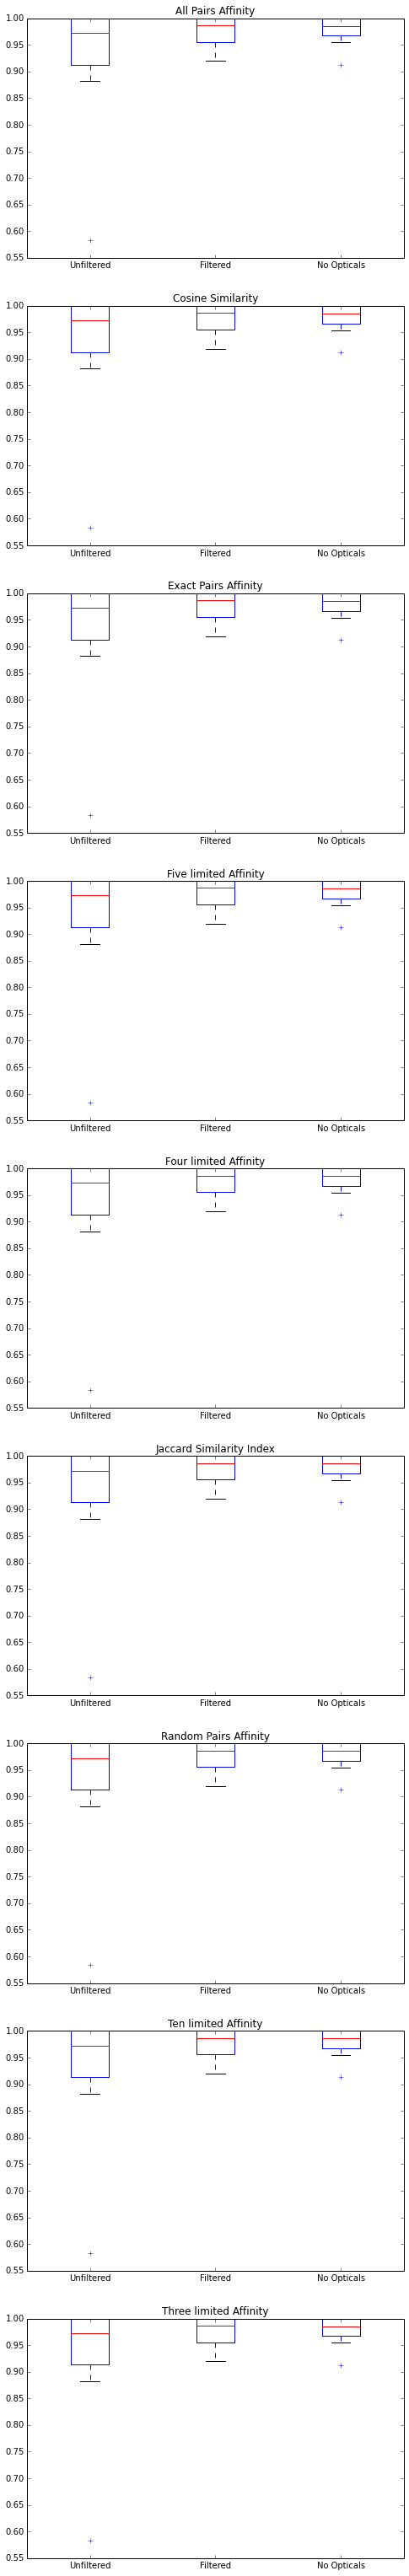

In [208]:
metrics = cleaned_exp_sens.index
print metrics

fig = plt.figure(figsize=(8, 6*len(metrics)))

i=0
for metric in metrics:
    i += 1
    ax=fig.add_subplot(len(metrics), 1, i)
    
    noF = pd.DataFrame(unfiltered_exp_sens.loc['Exact Pairs Affinity'])
    optNo = pd.DataFrame(no_opticals_exp_sens.loc['Exact Pairs Affinity'])
    cl = pd.DataFrame(cleaned_exp_sens.loc['Exact Pairs Affinity'])

    # display(noF)
    # display(optNo)
    # display(cl)

    ax= plt.gca()
        # ax.scatter(x=x_val, y=unfiltered_exp_sens["pcr_free"], c=rows)
        # ax.scatter(x=x_val+1, y=no_opticals_exp_sens["pcr_free"], c=rows)
        # ax.scatter(x=x_val+2, y=cleaned_exp_sens["pcr_free"], c=rows)

    bp = ax.boxplot([noF, optNo, cl])
    ax.set_xticklabels(labs)
    ax.set_title(metric)
#     ax.set_ylim(0.8,1)

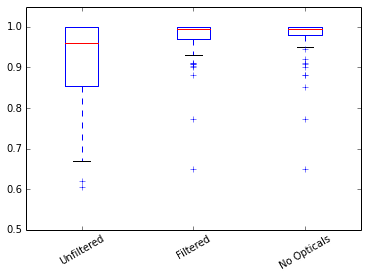

In [357]:
ax = plt.gca()
ax.set_ylim((0.5, 1.05))

ax.set_xticklabels(labs, rotation=30)
bp = ax.boxplot([unfiltered_exp_sens_nt, no_opticals_exp_sens_nt, cleaned_exp_sens_nt])


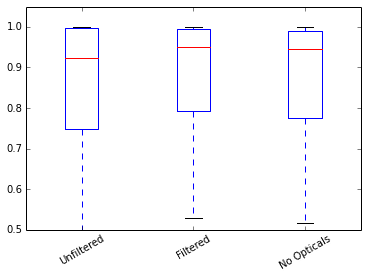

In [358]:
ax = plt.gca()
ax.set_ylim((0.5, 1.05))
ax.set_xticklabels(labs, rotation=30)

bp = ax.boxplot([unfiltered_exp_spec_nt, no_opticals_exp_spec_nt, cleaned_exp_spec_nt])


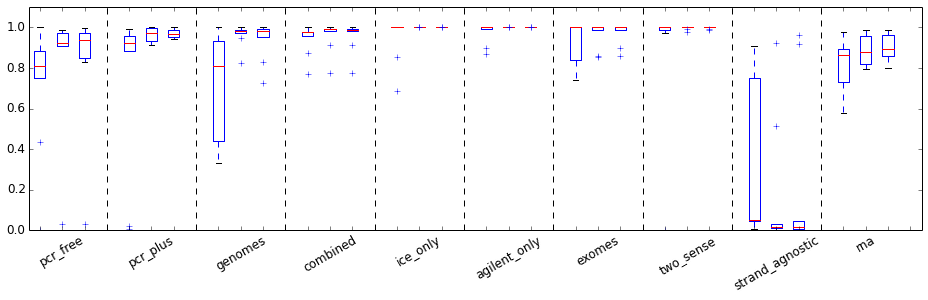

In [258]:

unfiltered_exp_sens.shape

unf = unfiltered_exp_sens
fil = no_opticals_exp_sens
cln = cleaned_exp_sens

datasets = unf.columns
n_subfigs = len(datasets)
dividers = np.arange(0,(n_subfigs*6),6)

fig = plt.figure(figsize=(16,4))
ax=plt.gca()

# datasets=['pcr_free', 'pcr_plus']
full=[]
xlabs = []
for dset in datasets:
    unf = unfiltered_exp_sens[dset]
    fil = no_opticals_exp_sens[dset]
    cln = cleaned_exp_sens[dset]
    fullset = [unf, fil, cln, []]
    xlab = ["",dset,"",""]
    full += fullset
    xlabs += xlab
 
bp = ax.boxplot(full)

ax.set_ylim((0.0, 1.1))
# ax.set_ylim((10^(-1), 1.0))

dividers = np.arange(0,4*len(datasets),4)
for x_thing in dividers:
    ax.plot([x_thing,x_thing], [0, 1.1], c='k', linestyle='--')

ax.set_xticklabels(xlabs, rotation=30)

font_size=12
# ax.tick_params(which='minor', color='w', labelsize=font_size)
ax.tick_params(which='major', labelsize=font_size)

# ax.set_yscale("log", nonposy='mask')
# ax.set_yscale('linear')
# ax.set_yscale('symlog')

print

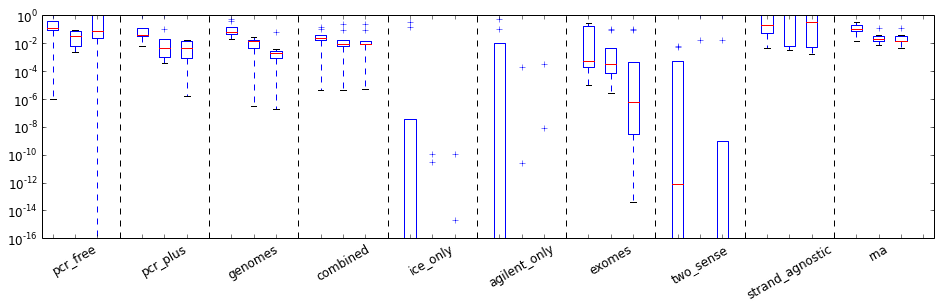

In [4]:

# unfiltered_exp_sens.shape

unf = unfiltered_exp_sens_nt
fil = no_opticals_exp_sens_nt
cln = cleaned_exp_sens_nt

datasets = unf.columns
n_subfigs = len(datasets)
dividers = np.arange(0,(n_subfigs*6),6)

fig = plt.figure(figsize=(16,4))
ax=plt.gca()

# datasets=['pcr_free', 'pcr_plus']
full=[]
xlabs = []
for dset in datasets:
#     unf = np.log(unfiltered_exp_sens[dset].clip(10**-12, 1-10**-5))
#     fil = np.log(no_opticals_exp_sens_nt[dset].clip(10**-12, 1-10**-5))
#     cln = np.log(cleaned_exp_sens_nt[dset].clip(10**-12, 1-10**-5))
    
    unf = unfiltered_exp_sens_nt[dset]
    fil = no_opticals_exp_sens_nt[dset]
    cln = cleaned_exp_sens_nt[dset]
    fullset = [unf, fil, cln, []]
    xlab = ["",dset,"",""]
    full += fullset
    xlabs += xlab
 
bp = ax.boxplot(full)

# ax.set_ylim((0.0, 1.1))
# ax.set_ylim((-10^(0), 0))
# ax.set_ylim(-0.05, 0.01)
ax.set_ylim(10**(-16), 10**0.01)

# start,end = ax.get_ylim()
# ytix = np.arange(start,end,0.00001)
# ax.set_yticks(ytix)

dividers = np.arange(0,4*len(datasets),4)
for x_thing in dividers:
#     ax.plot([x_thing,x_thing], [0, 1.1], c='k', linestyle='--')
        ax.plot([x_thing,x_thing], [10**(-16), 10**1], c='k', linestyle='--')


ax.set_xticklabels(xlabs, rotation=30)

font_size=12
# ax.tick_params(which='minor', color='w', labelsize=font_size)
ax.tick_params(which='major', labelsize=font_size)

ax.set_yscale("log", nonposy='mask')
# ax.set_yscale('linear')
# ax.set_yscale('symlog')

print

'Look here'

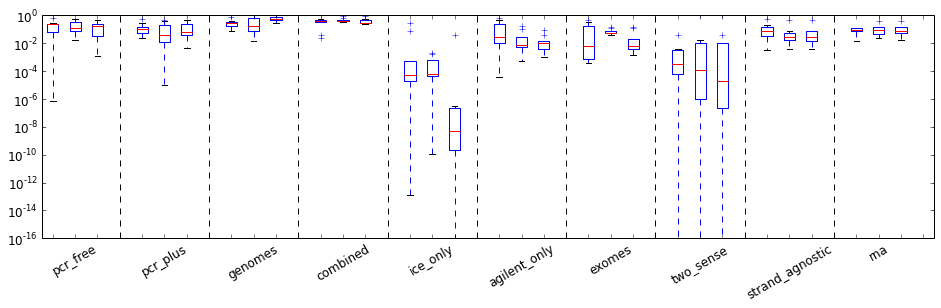

In [5]:

# unfiltered_exp_sens.shape

unf = unfiltered_exp_spec_nt
fil = no_opticals_exp_spec_nt
cln = cleaned_exp_spec_nt

datasets = unf.columns
n_subfigs = len(datasets)
dividers = np.arange(0,(n_subfigs*6),6)

fig = plt.figure(figsize=(16,4))
ax=plt.gca()

# datasets=['pcr_free', 'pcr_plus']
full=[]
xlabs = []
for dset in datasets:
#     unf = np.log(unfiltered_exp_sens[dset].clip(10**-12, 1-10**-5))
#     fil = np.log(no_opticals_exp_sens_nt[dset].clip(10**-12, 1-10**-5))
#     cln = np.log(cleaned_exp_sens_nt[dset].clip(10**-12, 1-10**-5))
    
    unf = unfiltered_exp_spec_nt[dset]
    fil = no_opticals_exp_spec_nt[dset]
    cln = cleaned_exp_spec_nt[dset]
    fullset = [unf, fil, cln, []]
    xlab = ["",dset,"",""]
    full += fullset
    xlabs += xlab
 
bp = ax.boxplot(full)

# ax.set_ylim((0.0, 1.1))
# ax.set_ylim((-10^(0), 0))
# ax.set_ylim(-0.05, 0.01)
ax.set_ylim(10**(-16), 10**0.01)

# start,end = ax.get_ylim()
# ytix = np.arange(start,end,0.00001)
# ax.set_yticks(ytix)

dividers = np.arange(0,4*len(datasets),4)
for x_thing in dividers:
#     ax.plot([x_thing,x_thing], [0, 1.1], c='k', linestyle='--')
        ax.plot([x_thing,x_thing], [10**(-16), 10**1], c='k', linestyle='--')


ax.set_xticklabels(xlabs, rotation=30)

font_size=12
# ax.tick_params(which='minor', color='w', labelsize=font_size)
ax.tick_params(which='major', labelsize=font_size)

ax.set_yscale("log", nonposy='mask')
# ax.set_yscale('linear')
# ax.set_yscale('symlog')

print

"Look here"

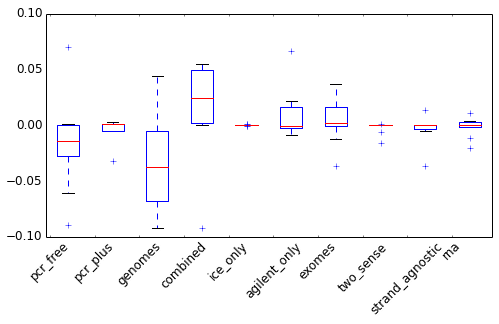

In [406]:

unfiltered_exp_sens.shape

unf = unfiltered_exp_spec_nt
fil = no_opticals_exp_spec_nt
cln = cleaned_exp_spec_nt

datasets = unf.columns
n_subfigs = len(datasets)
dividers = np.arange(0,(n_subfigs*6),6)

fig = plt.figure(figsize=(8,4))
ax=plt.gca()

# datasets=['pcr_free', 'pcr_plus']
full=[]
xlabs = []
for dset in datasets:
#     unf = np.log(unfiltered_exp_sens[dset].clip(10**-12, 1-10**-5))
#     fil = np.log(no_opticals_exp_sens_nt[dset].clip(10**-12, 1-10**-5))
#     cln = np.log(cleaned_exp_sens_nt[dset].clip(10**-12, 1-10**-5))

#     diff = no_opticals_exp_sens_nt[dset] - unfiltered_exp_sens_nt[dset]
#     diff = no_opticals_exp_spec_nt[dset] - unfiltered_exp_spec_nt[dset]

    
    
#     diff = cleaned_exp_sens_nt[dset] - no_opticals_exp_sens_nt[dset]
    diff = cleaned_exp_spec_nt[dset] - no_opticals_exp_spec_nt[dset]

#     unf = unfiltered_exp_spec_nt[dset]
#     fil = no_opticals_exp_spec_nt[dset]
#     cln = cleaned_exp_spec_nt[dset]
    fullset = [diff]
    xlab = [dset]
    full += fullset
    xlabs += xlab
 
bp = ax.boxplot(full)

ax.set_ylim((-0.1, 0.1))
# ax.set_ylim((-10^(0), 0))
# ax.set_ylim(-0.05, 0.01)
# ax.set_ylim(10**(-0.2), 10**0.01)

# start,end = ax.get_ylim()
# ytix = np.arange(start,end,0.00001)
# ax.set_yticks(ytix)

dividers = np.arange(0,4*len(datasets),4)
# for x_thing in dividers:
#     ax.plot([x_thing,x_thing], [0, 1.1], c='k', linestyle='--')
#         ax.plot([x_thing,x_thing], [10**(-5), 10**1], c='k', linestyle='--')

# ax.plot([0,12],[0,0], c='k', linestyle='--')

ax.set_xticks(ax.get_xticks()-0.4, minor=True)
ax.set_xticklabels(xlabs, rotation=45, minor=True)
ax.set_xticklabels([], rotation=30)

font_size=12
ax.tick_params(which='minor', labelsize=font_size)
ax.tick_params(which='major', color='w', labelsize=font_size)

# ax.set_yscale("log", nonposy='mask')
# ax.set_yscale('linear')
# ax.set_yscale('symlog')

print

In [182]:
print no_opticals_exp_sens_nt.median()

pcr_free           0.968180
pcr_plus           0.995408
genomes            0.983369
combined           0.991308
ice_only           1.000000
agilent_only       1.000000
exomes             0.999668
two_sense          1.000000
strand_agnostic    0.005862
rna                0.980499
dtype: float64


In [180]:
cleaned_exp_sens_nt.median()

pcr_free           0.964363
pcr_plus           0.995575
genomes            0.989682
combined           0.984235
ice_only           1.000000
agilent_only       1.000000
exomes             0.999892
two_sense          1.000000
strand_agnostic    0.005865
rna                0.979453
dtype: float64

In [238]:
print no_opticals_exp_spec_nt.median()
print 
print cleaned_exp_sens_nt.median()

pcr_free           0.870091
pcr_plus           0.976968
genomes            0.829812
combined           0.603221
ice_only           0.999845
agilent_only       0.993437
exomes             0.947225
two_sense          0.999886
strand_agnostic    0.975013
rna                0.932850
dtype: float64

pcr_free           0.964363
pcr_plus           0.995575
genomes            0.989682
combined           0.984235
ice_only           1.000000
agilent_only       1.000000
exomes             0.999892
two_sense          1.000000
strand_agnostic    0.005865
rna                0.979453
dtype: float64


In [360]:
cleaned_exp_sens_nt - no_opticals_exp_sens_nt

,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,0.000880,-0.016877,-1.742019e-03,0.000038,1.852785e-11,0.000000e+00,4.040176e-04,0.999881,-1.331726e-10,-0.000006
Cosine Similarity,0.000006,0.000143,5.231310e-08,-0.000522,-1.136944e-10,5.509484e-05,-4.173251e-04,-0.010634,2.800745e-06,-0.000065
Exact Pairs Affinity,-0.004789,-0.000285,-2.568873e-03,-0.007886,0.000000e+00,0.000000e+00,-2.769156e-07,0.000000,5.334334e-04,0.003991
Five limited Affinity,-0.027988,0.000642,5.684731e-03,-0.009153,0.000000e+00,0.000000e+00,1.144684e-04,0.000000,2.085436e-04,-0.002415
Four limited Affinity,-0.009524,0.000260,4.021834e-02,0.000776,0.000000e+00,0.000000e+00,1.178943e-04,0.000000,1.590043e-03,0.005629
Jaccard Similarity Index,-0.001365,0.999998,1.090574e-02,0.000056,0.000000e+00,-8.342364e-09,-2.791014e-05,-1.000000,-3.057403e-05,-0.000004
Random Pairs Affinity,-0.015793,0.000167,2.693742e-02,-0.003525,0.000000e+00,0.000000e+00,-1.660705e-04,0.000000,-1.330544e-04,-0.006655
Ten limited Affinity,-0.055989,0.039798,5.996990e-04,0.000186,0.000000e+00,0.000000e+00,2.818522e-03,0.000000,-2.095426e-04,0.003858
Three limited Affinity,-0.003817,0.000126,3.971833e-04,-0.008512,0.000000e+00,0.000000e+00,-6.746925e-06,0.000000,-1.230868e-03,-0.000390


In [329]:
print no_opticals_exp_sens_nt.mean() - cleaned_exp_sens_nt.mean()
print
print no_opticals_exp_sens_nt.median() - cleaned_exp_sens_nt.median()
# print cleaned_exp_sens_nt.mean()

pcr_free           1.315323e-02
pcr_plus          -1.137746e-01
genomes           -8.936920e-03
combined           3.171498e-03
ice_only           1.057410e-11
agilent_only      -6.120722e-06
exomes            -3.151748e-04
two_sense          1.194832e-03
strand_agnostic   -8.119794e-05
rna               -4.382866e-04
dtype: float64

pcr_free           0.003817
pcr_plus          -0.000167
genomes           -0.006314
combined           0.007072
ice_only           0.000000
agilent_only       0.000000
exomes            -0.000224
two_sense          0.000000
strand_agnostic   -0.000003
rna                0.001045
dtype: float64


In [341]:
print no_opticals_exp_spec_nt.mean() - cleaned_exp_spec_nt.mean()
print
print no_opticals_exp_spec_nt.median() - cleaned_exp_spec_nt.median()

pcr_free           0.016608
pcr_plus          -0.007283
genomes            0.034979
combined          -0.017390
ice_only          -0.000178
agilent_only      -0.010224
exomes            -0.005500
two_sense         -0.108752
strand_agnostic    0.003561
rna                0.001822
dtype: float64

pcr_free           0.027970
pcr_plus           0.014525
genomes            0.077250
combined          -0.039855
ice_only           0.000272
agilent_only       0.002323
exomes             0.000148
two_sense         -0.000111
strand_agnostic    0.000356
rna                0.011651
dtype: float64


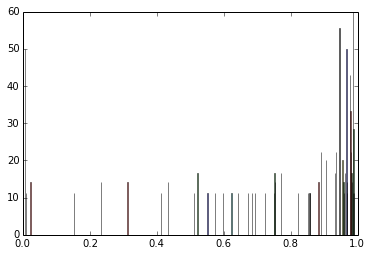

In [202]:


my_bins=np.arange(-0.01,1,.01)
ax = plt.gca()
ax.hist(cleaned_exp_spec.values, normed=True, bins=my_bins, alpha=0.5, label='Same-library')
print

In [57]:

unfiltered_exp_sens.shape

unf = unfiltered_exp_sens.T
fil = no_opticals_exp_sens.T
cln = cleaned_exp_sens.T

datasets = unf.columns
n_subfigs = len(datasets)
dividers = np.arange(0,(n_subfigs*6),6)

fig = plt.figure(figsize=(16,4))
ax=plt.gca()

# datasets=['pcr_free', 'pcr_plus']
full=[]
xlabs = []
for dset in datasets:
#     print dset
    unfY = unf[dset]
#     print unfY
    filY = fil[dset]
    clnY = cln[dset]
    fullset = [unfY, filY, clnY, []]
    xlab = ["",dset,"",""]
    full += fullset
    xlabs += xlab
 
bp = ax.boxplot(full)

ax.set_ylim((0.0, 1.0))

dividers = np.arange(0,4*len(datasets),4)
for x_thing in dividers:
    ax.plot([x_thing,x_thing], [0, 1.1], c='k', linestyle='--')

ax.set_xticklabels(xlabs, rotation=30)

font_size=12
# ax.tick_params(which='minor', color='w', labelsize=font_size)
ax.tick_params(which='major', labelsize=font_size)
print


NameError: name 'unfiltered_exp_sens' is not defined

In [297]:
8*4

32

In [ ]:
LLR_spec

In [ ]:
fig = plt.figure(1, figsize=(8,6))
plot_scatter(metrics["LLR_specificity"], metrics["LLR_sensitivity"], "Specificity", "Sensitivity", "LLR Pairwise Performance by Dataset", ax=plot1, display_legend=True)


In [ ]:
for key, value in metrics.iteritems():
    metrics[key] = metrics[key].sort_index()

In [ ]:
noOpticalDups = all_sets(["ice_only"], "noF")

In [ ]:
fig = plt.figure(1, figsize=(24,6))
plot1 = fig.add_subplot(131)
plot2 = fig.add_subplot(132)
plot3 = fig.add_subplot(133)
plot_scatter(metrics["LLR_specificity"], metrics["LLR_sensitivity"], "Specificity", "Sensitivity", "LLR Pairwise Performance by Dataset", ax=plot1, display_legend=True)
plot_scatter(metrics["Cluster_specificity"], metrics["Cluster_sensitivity"], "Specificity", "Sensitivity", "Distance Clustering Performance by Dataset", ax=plot2)
plot_scatter(metrics["ratio_cluster_specificity"], metrics["ratio_cluster_sensitivity"], "Specificity", "Sensitivity", "Ratio Clustering Performance by Dataset", ax=plot3)


fig2 = plt.figure(2, figsize=(24,6))
plot21 = fig2.add_subplot(131)
plot22 = fig2.add_subplot(132)
plot23 = fig2.add_subplot(133)
plot_scatter(metrics["LLR_specificity"], metrics["Cluster_specificity"], "Pairwise Specificity", "Clustering Specificity", "Pairwise vs Clustering Specificity by Dataset", ax=plot21, draw_line=True, display_legend=True)
plot_scatter(metrics["LLR_specificity"], metrics["ratio_cluster_specificity"], "Pairwise Specificity", "Ratio Clustering Specificity", "Pairwise vs Ratio Clustering Specificity by Dataset", ax=plot22, draw_line=True, display_legend=False)
plot_scatter(metrics["Cluster_specificity"], metrics["ratio_cluster_specificity"], "Clustering Specificity", "Ratio Clustering Specificity", "Clustering vs Ratio Clustering Specificity by Dataset", ax=plot23, draw_line=True, display_legend=False)


fig3 = plt.figure(3, figsize=(24,6))
plot31 = fig3.add_subplot(131)
plot32 = fig3.add_subplot(132)
plot33 = fig3.add_subplot(133)
plot_scatter(metrics["LLR_sensitivity"], metrics["Cluster_sensitivity"], "LLR Pairwise Sensitivity", "Clustering Sensitivity", "LLR Pairwise vs Clustering Sensitivity by Dataset", ax=plot31, draw_line=True, display_legend=True)
plot_scatter(metrics["LLR_sensitivity"], metrics["ratio_cluster_sensitivity"], "LLR Pairwise Sensitivity", "Ratio Clustering Sensitivity", "LLR Pairwise vs Ratio Clustering Sensitivity by Dataset", ax=plot32, draw_line=True, display_legend=False)
plot_scatter(metrics["Cluster_sensitivity"], metrics["ratio_cluster_sensitivity"], "Cluster Sensitivity", "Ratio Clustering Sensitivity", "Clustering vs Ratio Clustering Sensitivity by Dataset", ax=plot33, draw_line=True, display_legend=False)

# plot_scatter(metrics["LLR_sensitivity"], metrics["Cluster_sensitivity"], "Pairwise Sensitivity", "Clustering Sensitivity", "Pairwise vs Clustering Specificity by Dataset", ax=plot22, draw_line=True)

In [ ]:
distances = metrics["LLR_specificity"].index
print len(metrics)
print len(distances)
n_distances = len(distances)
fig = plt.figure(figsize=(24, 6*n_distances))
for i in xrange(n_distances):
    # Snip out the single metric we are interested in, across all datasets
    distance = distances[i]
    Lsp = pd.DataFrame(metrics["LLR_specificity"].loc[distance]).T
    Lse = pd.DataFrame(metrics["LLR_sensitivity"].loc[distance]).T
    
    Csp = pd.DataFrame(metrics["Cluster_specificity"].loc[distance]).T
    Cse = pd.DataFrame(metrics["Cluster_sensitivity"].loc[distance]).T
    
    LCsp = pd.DataFrame(metrics["ratio_cluster_specificity"].loc[distance]).T
    LCse = pd.DataFrame(metrics["ratio_cluster_sensitivity"].loc[distance]).T
    
    # Get the appropriate axes
    plot_columns = 3
    cell_adjustment = i * plot_columns
    L_plot = fig.add_subplot(n_distances, plot_columns, cell_adjustment + 1)
    C_plot = fig.add_subplot(n_distances, plot_columns, (cell_adjustment + 2))
    LC_plot = fig.add_subplot(n_distances, plot_columns, (cell_adjustment + 3))
    
    # Only display the legend once
    doLegend = (i==0)
    
    plot_scatter(Lsp, Lse, "Specificity", "Sensitivity", "LLR Pairwise Performance "+distance, ax=L_plot, display_legend=doLegend)
    plot_scatter(Csp, Cse, "Specificity", "Sensitivity", "Distance Clustering Performance "+distance, ax=C_plot, display_legend=False)
    plot_scatter(LCsp, LCse, "Specificity", "Sensitivity", "Ratio Clustering Performance "+distance, ax=LC_plot, display_legend=False)




In [ ]:
distance = u'Exact Pairs Affinity'

Lsp = pd.DataFrame(metrics["LLR_specificity"].loc[distance]).T
Lse = pd.DataFrame(metrics["LLR_sensitivity"].loc[distance]).T

Csp = pd.DataFrame(metrics["Cluster_specificity"].loc[distance]).T
Cse = pd.DataFrame(metrics["Cluster_sensitivity"].loc[distance]).T

LCsp = pd.DataFrame(metrics["ratio_cluster_specificity"].loc[distance]).T
LCse = pd.DataFrame(metrics["ratio_cluster_sensitivity"].loc[distance]).T

Rsp = pd.DataFrame(metrics["ratio_specificity"].loc[distance]).T
Rse = pd.DataFrame(metrics["ratio_sensitivity"].loc[distance]).T


fig = plt.figure(1, figsize=(24,6))
plot1 = fig.add_subplot(131)
plot2 = fig.add_subplot(132)
plot3 = fig.add_subplot(133)
plot_scatter(Lsp, Lse, "Specificity", "Sensitivity", "LLR Pairwise Performance by Dataset", ax=plot1, display_legend=True, draw_nineties=True)
plot_scatter(Csp, Cse, "Specificity", "Sensitivity", "Similarity Clustering Performance by Dataset", ax=plot2, draw_nineties=True)
plot_scatter(LCsp, LCse, "Specificity", "Sensitivity", "Likelihood Ratio Clustering Performance by Dataset", ax=plot3, draw_nineties=True)


fig2 = plt.figure(2, figsize=(24,6))
plot21 = fig2.add_subplot(131)
plot22 = fig2.add_subplot(132)
plot23 = fig2.add_subplot(133)
plot_scatter(Lsp, Csp, "LLR Pairwise Specificity", "Similarity Clustering Specificity", "LLR Pairwise vs Similarity Clustering Specificity by Dataset", ax=plot21, draw_line=True, display_legend=False)
plot_scatter(Lsp, LCsp, "LLR Pairwise Specificity", "Likelihood Ratio Clustering Specificity", "LLR Pairwise vs Likelihood Ratio Clustering Specificity by Dataset", ax=plot22, draw_line=True, display_legend=False)
plot_scatter(Csp, LCsp, "Similarity Clustering Specificity", "Likelihood Ratio Clustering Specificity", "Similarity Clustering vs Likelihood Ratio Clustering Specificity by Dataset", ax=plot23, draw_line=True, display_legend=False)


fig3 = plt.figure(3, figsize=(24,6))
plot31 = fig3.add_subplot(131)
plot32 = fig3.add_subplot(132)
plot33 = fig3.add_subplot(133)
plot_scatter(Lse, Cse, "LLR Pairwise Sensitivity", "Similarity Clustering Sensitivity", "LLR Pairwise vs Similarity Score Clustering Sensitivity by Dataset", ax=plot31, draw_line=True, display_legend=False)
plot_scatter(Lse, LCse, "LLR Pairwise Sensitivity", "Likelihood Ratio Clustering Sensitivity", "LLR Pairwise vs Likelihood Ratio Clustering Sensitivity by Dataset", ax=plot32, draw_line=True, display_legend=False)
plot_scatter(Cse, LCse, "Similarity Clustering Sensitivity", "Likelihood Ratio Clustering Sensitivity", "Similarity Clustering vs Likelihood Ratio Clustering Sensitivity by Dataset", ax=plot33, draw_line=True, display_legend=False)

# plot_scatter(metrics["LLR_sensitivity"], metrics["Cluster_sensitivity"], "Pairwise Sensitivity", "Clustering Sensitivity", "Pairwise vs Clustering Specificity by Dataset", ax=plot22, draw_line=True)

In [377]:
cleaned_sens.T

,All Pairs Affinity,Cosine Similarity,Exact Pairs Affinity,Five limited Affinity,Four limited Affinity,Jaccard Similarity Index,Random Pairs Affinity,Ten limited Affinity,Three limited Affinity
pcr_free,1.000000,0.500000,0.949275,0.878623,0.918478,0.550725,0.916667,0.652174,0.931159
pcr_plus,0.890533,0.519231,0.963018,0.924556,0.942308,0.899408,0.949704,0.920118,0.963018
genomes,0.414495,0.226384,0.926710,0.864821,0.938111,0.726384,0.935668,0.441368,0.937296
combined,0.223188,0.271884,0.608116,0.608116,0.608116,0.440580,0.605217,0.597681,0.608116
ice_only,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
agilent_only,1.000000,0.991124,1.000000,1.000000,1.000000,0.991124,1.000000,1.000000,1.000000
exomes,1.000000,0.831034,1.000000,1.000000,1.000000,0.917241,1.000000,1.000000,1.000000
two_sense,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
strand_agnostic,0.644444,0.363889,0.994444,0.922222,0.922222,0.666667,0.905556,0.886111,0.994444
rna,0.692964,0.938166,1.000000,0.985075,0.995736,0.940299,0.948827,0.940299,0.995736


Index([u'All Pairs Affinity', u'Cosine Similarity', u'Exact Pairs Affinity',
       u'Five limited Affinity', u'Four limited Affinity',
       u'Jaccard Similarity Index', u'Random Pairs Affinity',
       u'Ten limited Affinity', u'Three limited Affinity'],
      dtype='object')
(-2.0, 10.0)
9
y TICKS


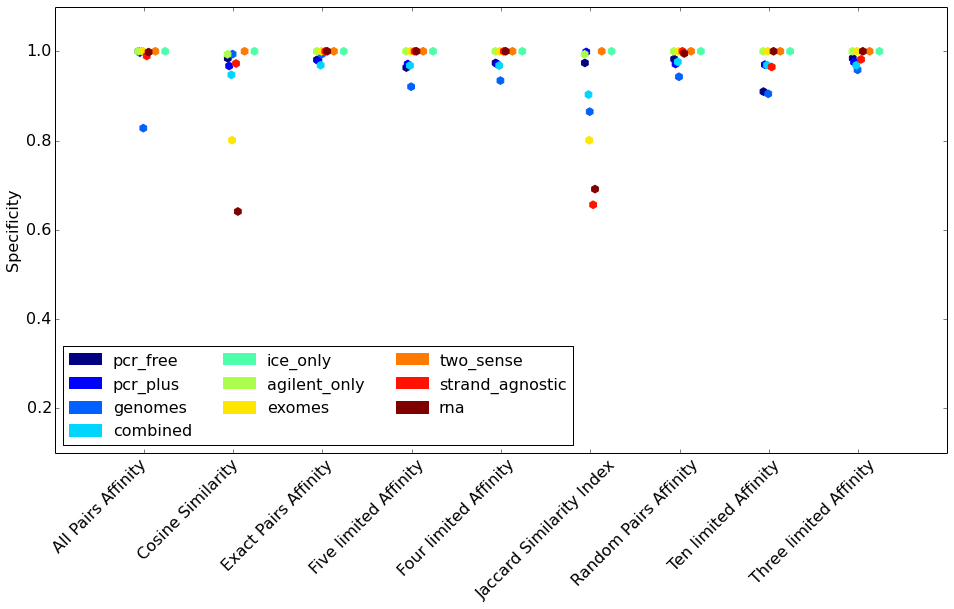

In [64]:
# cl = cleaned_sens.T
# ylab = 'Sensitivity'

# cl = cleaned_nt_sens.T
# ylab = 'Sensitivity'

cl = cleaned_nt_spec.T
ylab = 'Specificity'

# cl = cleaned_spec.T
# ylab = 'Specificity'

# cl= no_opticals_nt_sens.T
# ylab = 'Sensitivity'

# cl = no_opticals_nt_spec.T
# ylab = 'Specificity'

# cl = cleaned_rand.T
# ylab = 'Rand Index'

fig = plt.figure(figsize=(16,8))

metrics = cl.columns
sets = cl.index

x=np.arange(len(metrics))

al = 1
marker_size=60

print metrics

x_vals = range(len(metrics))
x_s = [x_vals for i in range(len(sets))]

jitter = np.column_stack(np.random.normal(0, 0.08, len(sets))).T
x_s = x_s + jitter

# jittered = dividers+jitter
# print jittered

# unf_offsets = dividers + 1
# unf_x = [unf_offsets] * len(unf.index)
# unf_x = unf_x + jitter




y_s = [[i]*len(metrics) for i in range(len(sets))]

ax = plt.gca()
ax.scatter(x=x_s, y=cl, c=y_s, s=marker_size, marker=mk.MarkerStyle.filled_markers[i], edgecolors='face', alpha=al)

# print x_vals

print ax.get_xlim()
print len(metrics)

ax.set_xticks(x)
ax.set_xticklabels([])
# Minor ticks
ax.set_xticks(x-0.5, minor=True)
ax.set_xticklabels(metrics, rotation=45, minor=True)

font_size=16
ax.tick_params(which='minor', color='w', labelsize=font_size)
ax.tick_params(which='major', labelsize=font_size)


print 'y TICKS'
# print ax.get_yticks()
# print ax.get_ylim()

ax.set_xlim((-1,len(metrics)))

ax.set_yticks(np.arange(0,1.4,0.2))
ax.set_ylim((0.10000000000000001, 1.1000000000000001))

ax.set_ylabel(ylab, fontsize=font_size)
# ax.legend()

#  if display_legend:
# Set up an extra set of handles/labels within the legend, for the color key
cmap = plt.cm.get_cmap()
norm = mcl.Normalize(vmin=0,vmax=len(sets)-1)
patches = []
for i in range(len(sets)):
    patches.append(mpatches.Patch(color=cmap(norm(i)), alpha=al))
handles, labels = ax.get_legend_handles_labels()
new_handle = [handle for i,handle in enumerate(handles)]+patches
new_label = [label for i,label in enumerate(labels)]+[dist for dist in sets]

# display the legend
#         ax.legend(new_handle, new_label, loc=3)


# ax.legend(new_handle, new_label, ncol=1, bbox_to_anchor=(4.3,1.01))
ax.legend(new_handle, new_label, ncol=3, loc=3, fontsize=font_size)

# ax.legend(new_handle, new_label, ncol=3, bbox_to_anchor=(2.3,1.01))


In [383]:
cleaned_rand


,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,0.000000,0.058781,0.246733,0.054296,0.0,0.000000,0.000000,0.0,0.120567,0.054795
Cosine Similarity,0.275709,0.249637,0.192871,0.093322,0.0,0.007347,0.195395,0.0,0.221631,0.307294
Exact Pairs Affinity,0.039007,0.034107,0.049505,0.056397,0.0,0.000000,0.000000,0.0,0.030142,0.000000
Five limited Affinity,0.194149,0.055152,0.135644,0.057044,0.0,0.000000,0.000000,0.0,0.053191,0.174380
Four limited Affinity,0.148050,0.044993,0.128317,0.056518,0.0,0.000000,0.000000,0.0,0.053191,0.134765
Jaccard Similarity Index,0.235816,0.050073,0.190099,0.129156,0.0,0.005714,0.184430,0.0,0.340426,0.307294
Random Pairs Affinity,0.061170,0.042090,0.100594,0.054822,0.0,0.000000,0.000000,0.0,0.058511,0.058867
Ten limited Affinity,0.275709,0.057329,0.231683,0.056599,0.0,0.000000,0.000000,0.0,0.066489,0.223991
Three limited Affinity,0.053191,0.034107,0.111287,0.056397,0.0,0.000000,0.000000,0.0,0.191489,0.077749


In [293]:
y_s
len(y_s)

10

In [292]:
len(sets)

10

In [69]:
cleaned_nt_sens


,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,1.000000,0.971893,0.734528,0.225507,1.0,1.000000,1.000000,1.0,0.644444,0.692964
Cosine Similarity,0.500000,0.519231,0.209283,0.271884,1.0,0.991124,0.825862,1.0,0.363889,0.938166
Exact Pairs Affinity,0.916667,0.977811,0.741857,0.609275,1.0,1.000000,1.000000,1.0,0.994444,1.000000
Five limited Affinity,0.840580,0.908284,0.421010,0.608116,1.0,1.000000,1.000000,1.0,0.886111,0.912580
Four limited Affinity,0.873188,0.942308,0.472313,0.608116,1.0,1.000000,1.000000,1.0,0.886111,0.940299
Jaccard Similarity Index,0.543478,0.924556,0.671010,0.440580,1.0,1.000000,0.917241,1.0,0.716667,0.938166
Random Pairs Affinity,0.902174,0.955621,0.513844,0.606957,1.0,1.000000,1.000000,1.0,0.891667,0.936034
Ten limited Affinity,0.789855,0.680473,0.410423,0.608116,1.0,1.000000,1.000000,1.0,0.886111,0.912580
Three limited Affinity,0.907609,0.957101,0.571661,0.608116,1.0,1.000000,1.000000,1.0,0.902778,0.912580


In [65]:
# for dset in cleaned_sens.columns:
#     print cleaned_sens[dset]
farp = pd.DataFrame(cleaned_nt_sens.max())
doof = cleaned_nt_sens.loc['Exact Pairs Affinity']
print doof
display(farp)

pcr_free           0.916667
pcr_plus           0.977811
genomes            0.741857
combined           0.609275
ice_only           1.000000
agilent_only       1.000000
exomes             1.000000
two_sense          1.000000
strand_agnostic    0.994444
rna                1.000000
Name: Exact Pairs Affinity, dtype: float64


,0
pcr_free,1.000000
pcr_plus,0.977811
genomes,0.741857
combined,0.609275
ice_only,1.000000
agilent_only,1.000000
exomes,1.000000
two_sense,1.000000
strand_agnostic,0.994444
rna,1.000000


In [66]:
pd.DataFrame([farp.values.flatten(), doof.values]).T

,0,1
0,1.000000,0.916667
1,0.977811,0.977811
2,0.741857,0.741857
3,0.609275,0.609275
4,1.000000,1.000000
5,1.000000,1.000000
6,1.000000,1.000000
7,1.000000,1.000000
8,0.994444,0.994444
9,1.000000,1.000000


In [67]:
farp = pd.DataFrame(cleaned_nt_spec.max())
doof = cleaned_nt_spec.loc['Exact Pairs Affinity']
print doof
display(farp)

pcr_free           0.980903
pcr_plus           0.978632
genomes            0.993721
combined           0.968734
ice_only           1.000000
agilent_only       1.000000
exomes             1.000000
two_sense          1.000000
strand_agnostic    1.000000
rna                1.000000
Name: Exact Pairs Affinity, dtype: float64


,0
pcr_free,1.000000
pcr_plus,0.998575
genomes,0.993721
combined,0.999826
ice_only,1.000000
agilent_only,1.000000
exomes,1.000000
two_sense,1.000000
strand_agnostic,1.000000
rna,1.000000


In [68]:
pd.DataFrame([farp.values.flatten(), doof.values]).T

,0,1
0,1.000000,0.980903
1,0.998575,0.978632
2,0.993721,0.993721
3,0.999826,0.968734
4,1.000000,1.000000
5,1.000000,1.000000
6,1.000000,1.000000
7,1.000000,1.000000
8,1.000000,1.000000
9,1.000000,1.000000


In [71]:
cleaned_nt_spec.T

,All Pairs Affinity,Cosine Similarity,Exact Pairs Affinity,Five limited Affinity,Four limited Affinity,Jaccard Similarity Index,Random Pairs Affinity,Ten limited Affinity,Three limited Affinity
pcr_free,1.000000,0.984375,0.980903,0.963542,0.973958,0.973958,0.982639,0.909722,0.984375
pcr_plus,0.997151,0.967236,0.978632,0.971510,0.971510,0.998575,0.971510,0.970085,0.975783
genomes,0.827839,0.993721,0.993721,0.920722,0.934328,0.864731,0.942962,0.904762,0.958399
combined,0.999826,0.947195,0.968734,0.968039,0.968039,0.903075,0.976290,0.969038,0.968734
ice_only,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
agilent_only,1.000000,0.993236,1.000000,1.000000,1.000000,0.993236,1.000000,1.000000,1.000000
exomes,1.000000,0.800754,1.000000,1.000000,1.000000,0.800754,1.000000,1.000000,1.000000
two_sense,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
strand_agnostic,0.989583,0.972656,1.000000,1.000000,1.000000,0.656250,1.000000,0.964844,0.981771
rna,0.998208,0.641129,1.000000,1.000000,1.000000,0.691308,0.995072,1.000000,1.000000


In [425]:
cleaned_nt_sens.T

,All Pairs Affinity,Cosine Similarity,Exact Pairs Affinity,Five limited Affinity,Four limited Affinity,Jaccard Similarity Index,Random Pairs Affinity,Ten limited Affinity,Three limited Affinity
pcr_free,1.000000,0.500000,0.943841,0.818841,0.896739,0.548913,0.931159,0.652174,0.920290
pcr_plus,0.852071,0.519231,0.963018,0.924556,0.924556,0.914201,0.927515,0.920118,0.954142
genomes,0.414495,0.226384,0.913681,0.864821,0.932410,0.726384,0.935668,0.441368,0.931596
combined,0.223188,0.271884,0.608116,0.608116,0.608116,0.440580,0.605217,0.597681,0.608116
ice_only,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
agilent_only,1.000000,0.991124,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
exomes,1.000000,0.831034,1.000000,1.000000,1.000000,0.917241,1.000000,1.000000,1.000000
two_sense,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
strand_agnostic,0.644444,0.363889,0.986111,0.886111,0.891667,0.716667,0.886111,0.886111,0.919444
rna,0.692964,0.938166,1.000000,0.912580,0.912580,0.938166,0.912580,0.912580,0.912580


In [264]:
blorpth

,0
pcr_free,1.000000
pcr_plus,0.963018
genomes,0.938111
combined,0.608116
ice_only,1.000000
agilent_only,1.000000
exomes,1.000000
two_sense,1.000000
strand_agnostic,0.994444
rna,1.000000


In [219]:

x_s

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [215]:
jitter

array([[-0.00922719],
       [ 0.05211394],
       [-0.09036662],
       [ 0.01333863],
       [-0.05622506],
       [-0.19119525],
       [ 0.03334316],
       [ 0.00190807],
       [-0.06190428],
       [ 0.01086123]])

In [218]:
x_s + jitter

array([[ -9.22719155e-03,   9.90772808e-01,   1.99077281e+00,
          2.99077281e+00,   3.99077281e+00,   4.99077281e+00,
          5.99077281e+00,   6.99077281e+00,   7.99077281e+00],
       [  5.21139419e-02,   1.05211394e+00,   2.05211394e+00,
          3.05211394e+00,   4.05211394e+00,   5.05211394e+00,
          6.05211394e+00,   7.05211394e+00,   8.05211394e+00],
       [ -9.03666225e-02,   9.09633377e-01,   1.90963338e+00,
          2.90963338e+00,   3.90963338e+00,   4.90963338e+00,
          5.90963338e+00,   6.90963338e+00,   7.90963338e+00],
       [  1.33386257e-02,   1.01333863e+00,   2.01333863e+00,
          3.01333863e+00,   4.01333863e+00,   5.01333863e+00,
          6.01333863e+00,   7.01333863e+00,   8.01333863e+00],
       [ -5.62250633e-02,   9.43774937e-01,   1.94377494e+00,
          2.94377494e+00,   3.94377494e+00,   4.94377494e+00,
          5.94377494e+00,   6.94377494e+00,   7.94377494e+00],
       [ -1.91195245e-01,   8.08804755e-01,   1.80880475e+00,
   

Index([u'All Pairs Affinity', u'Cosine Similarity', u'Exact Pairs Affinity',
       u'Five limited Affinity', u'Four limited Affinity',
       u'Jaccard Similarity Index', u'Random Pairs Affinity',
       u'Ten limited Affinity', u'Three limited Affinity'],
      dtype='object')
[0, 1, 2, 3, 4, 5, 6, 7, 8]
y TICKS


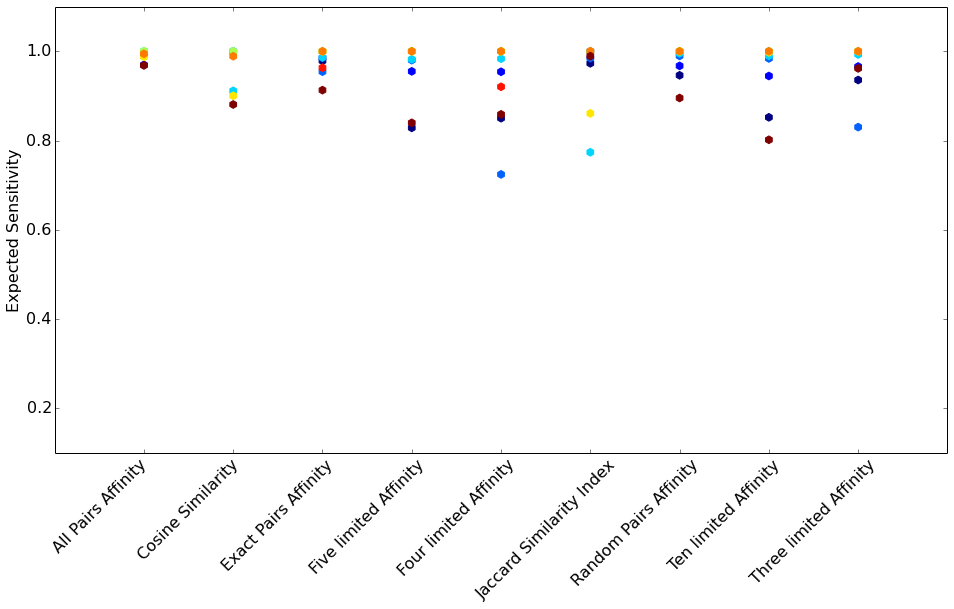

In [208]:
cl = cleaned_exp_sens.T
ylab = 'Expected Sensitivity'

# cl = cleaned_exp_spec.T
# ylab = 'Expected Specificity'

fig = plt.figure(figsize=(16,8))

metrics = cl.columns
sets = cl.index

x=np.arange(len(metrics))

al = 1
marker_size=60

print metrics

x_vals = range(len(metrics))
x_s = [x_vals for i in range(len(sets))]

y_s = [[i]*len(metrics) for i in range(len(sets))]

ax = plt.gca()
ax.scatter(x=x_s, y=cl, c=y_s, s=marker_size, marker=mk.MarkerStyle.filled_markers[i], edgecolors='face', alpha=al)

print x_vals

ax.set_xticks(x)
ax.set_xticklabels([])
# Minor ticks
ax.set_xticks(x-0.5, minor=True)
ax.set_xticklabels(metrics, rotation=45, minor=True)

font_size=16
ax.tick_params(which='minor', color='w', labelsize=font_size)
ax.tick_params(which='major', labelsize=font_size)


print 'y TICKS'
# print ax.get_yticks()
# print ax.get_ylim()


ax.set_yticks(np.arange(0,1.4,0.2))
ax.set_ylim((0.10000000000000001, 1.1000000000000001))

ax.set_ylabel(ylab, fontsize=font_size)
# ax.legend()

#  if display_legend:
# Set up an extra set of handles/labels within the legend, for the color key
# cmap = plt.cm.get_cmap()
# norm = mcl.Normalize(vmin=0,vmax=rows[-1])
# patches = []
# for i in range(len(sets)):
#     patches.append(mpatches.Patch(color=cmap(norm(i)), alpha=al))
# handles, labels = ax.get_legend_handles_labels()
# new_handle = [handle for i,handle in enumerate(handles)]+patches
# new_label = [label for i,label in enumerate(labels)]+[dist for dist in sets]

# display the legend
#         ax.legend(new_handle, new_label, loc=3)
# ax.legend(new_handle, new_label, ncol=1, bbox_to_anchor=(4.3,1.01))
# ax.legend(new_handle, new_label, ncol=1, loc=3)

# ax.legend(new_handle, new_label, ncol=3, bbox_to_anchor=(2.3,1.01))


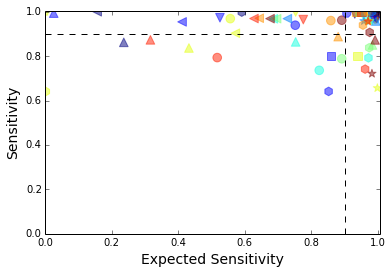

In [202]:
plot_scatter2(cleaned_exp_spec, cleaned_spec, "Expected Sensitivity", "Sensitivity", 0, 0, None, ax=plt.gca(), draw_nineties=True, display_legend=False)


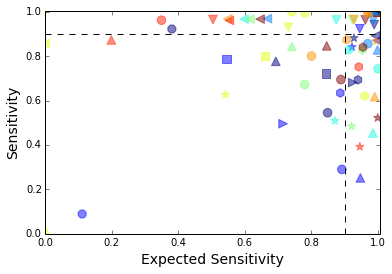

In [201]:
plot_scatter2(unfiltered_exp_spec, unfiltered_spec, "Expected Sensitivity", "Sensitivity", 0, 0, None, ax=plt.gca(), draw_nineties=True, display_legend=False)


In [199]:
cleaned_exp_sens

,pcr_free,pcr_plus,genomes,combined,ice_only,agilent_only,exomes,two_sense,strand_agnostic,rna
All Pairs Affinity,0.999149,0.969584,0.994556,0.999996,1.0,1.000000,0.987638,0.994432,1.066290e-07,0.968439
Cosine Similarity,0.030279,0.999365,1.000000,0.911500,1.0,0.999869,0.900413,0.988907,5.864884e-03,0.880817
Exact Pairs Affinity,0.978594,0.985230,0.954362,0.986044,1.0,1.000000,0.999999,1.000000,9.631102e-01,0.912968
Five limited Affinity,0.828502,0.955062,0.980155,0.982154,1.0,1.000000,0.999782,1.000000,2.605040e-02,0.839771
Four limited Affinity,0.850104,0.954108,0.724236,0.983346,1.0,1.000000,0.999929,1.000000,9.204865e-01,0.858755
Jaccard Similarity Index,0.973099,1.000000,0.984684,0.773820,1.0,0.999998,0.860967,1.000000,1.944716e-03,0.989182
Random Pairs Affinity,0.946185,0.967336,0.989682,0.995473,1.0,1.000000,0.999823,1.000000,1.595908e-02,0.895409
Ten limited Affinity,0.852097,0.944670,0.983969,0.989963,1.0,1.000000,0.997784,1.000000,1.237071e-02,0.801769
Three limited Affinity,0.935662,0.965920,0.830127,0.992919,1.0,1.000000,0.999999,1.000000,4.434046e-02,0.961690


In [190]:
print cl.columns
print 
print cl.index

display(cl)

Index([u'All Pairs Affinity', u'Cosine Similarity', u'Exact Pairs Affinity',
       u'Five limited Affinity', u'Four limited Affinity',
       u'Jaccard Similarity Index', u'Random Pairs Affinity',
       u'Ten limited Affinity', u'Three limited Affinity'],
      dtype='object')

Index([u'pcr_free', u'pcr_plus', u'genomes', u'combined', u'ice_only',
       u'agilent_only', u'exomes', u'two_sense', u'strand_agnostic', u'rna'],
      dtype='object')


,All Pairs Affinity,Cosine Similarity,Exact Pairs Affinity,Five limited Affinity,Four limited Affinity,Jaccard Similarity Index,Random Pairs Affinity,Ten limited Affinity,Three limited Affinity
pcr_free,0.984873,0.751399,0.981651,0.823355,0.890902,0.556344,0.858207,0.517106,0.890996
pcr_plus,0.930073,0.525289,0.998482,0.962277,0.989028,0.752510,0.991328,0.775500,0.995388
genomes,0.236653,0.026341,0.993028,0.752562,0.983202,0.432187,0.880161,0.316564,0.991031
combined,0.156682,0.411492,0.727550,0.685469,0.695398,0.571505,0.643076,0.627285,0.675553
ice_only,0.999939,1.000000,0.999960,0.999440,0.999963,0.999993,0.998861,1.000000,0.999610
agilent_only,0.990492,0.905777,0.987513,0.991626,0.998976,0.956569,0.989801,0.991250,0.987279
exomes,0.945969,0.858174,0.946734,0.947076,0.945145,0.938242,0.933289,0.949537,0.981453
two_sense,1.000000,0.998771,0.999979,1.000000,1.000000,0.000000,0.967586,0.999997,1.000000
strand_agnostic,0.996344,0.984723,0.957549,0.975728,0.973905,0.997822,0.970040,0.969775,0.981576
rna,0.590769,0.851513,0.982131,0.971088,0.973416,0.002550,0.954662,0.961097,0.974674


In [148]:
np.arange(0,1.4,0.2)

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2])

In [93]:
[1]*len(metrics)

[1, 1, 1, 1, 1, 1, 1, 1, 1]

In [339]:
my_table = read_table("noF_test_ice_only_libraries.table.json")

KeyboardInterrupt: 

In [ ]:
keycount = 0
minkey = 1000
maxkey = -1
for key, value in my_table.iteritems():
    if -1 in key:
        print key
    if not key:
        print "NOT KEY",
        print key
    else:
        if 0 in key:
            keycount += 1
        if max(key) > maxkey: maxkey = max(key)
        if min(key) < minkey: minkey = min(key)

        if value < 1:
            print key,
            print " : ",
            print value
print "done"
print keycount
print maxkey
print minkey
print len(my_table.keys())

In [ ]:
meta = read_metadata("feb_test_pcr_plus_libraries.read_groups.json")

In [ ]:
keys = [key for key in meta.iterkeys()]
keys

In [ ]:
"OK WE ARE GOING TO START FULL EXPECTED HERE"

In [7]:
"FALSE SENSES FRIG"

# cleaned_exp_sens_nt=expected_fails_to_successses(pd.DataFrame.from_csv('feb_Expected_False-Sames_evaluation_NEW_THRESHOLD.csv'))
# cleaned_exp_spec_nt=expected_fails_to_successses(pd.DataFrame.from_csv('feb_Expected_False-Diffs_evaluation_NEW_THRESHOLD.csv'))
full_cleaned_exp_false_sames_nt=pd.DataFrame.from_csv('feb_full_ex_false_sames_evaluation_NEW_THRESHOLD_wFullFalses.csv')
full_cleaned_exp_false_diffs_nt=pd.DataFrame.from_csv('feb_full_ex_false_diffs_evaluation_NEW_THRESHOLD_wFullFalses.csv')

# no_opticals_exp_sens_nt=expected_fails_to_successses(pd.DataFrame.from_csv('optNo_Expected_False-Sames_evaluation_NEW_THRESHOLD.csv'))
# no_opticals_exp_spec_nt=expected_fails_to_successses(pd.DataFrame.from_csv('optNo_Expected_False-Diffs_evaluation_NEW_THRESHOLD.csv'))
full_no_opticals_exp_false_sames_nt=pd.DataFrame.from_csv('optNo_full_ex_false_sames_evaluation_NEW_THRESHOLD_wFullFalses.csv')
full_no_opticals_exp_false_diffs_nt=pd.DataFrame.from_csv('optNo_full_ex_false_diffs_evaluation_NEW_THRESHOLD_wFullFalses.csv')

# unfiltered_exp_sens_nt=expected_fails_to_successses(pd.DataFrame.from_csv('noF_Expected_False-Sames_evaluation_NEW_THRESHOLD.csv'))
# unfiltered_exp_spec_nt=expected_fails_to_successses(pd.DataFrame.from_csv('noF_Expected_False-Diffs_evaluation_NEW_THRESHOLD.csv'))
full_unfiltered_exp_false_sames_nt=pd.DataFrame.from_csv('noF_full_ex_false_sames_evaluation_NEW_THRESHOLD_wFullFalses.csv')
full_unfiltered_exp_false_diffs_nt=pd.DataFrame.from_csv('noF_full_ex_false_diffs_evaluation_NEW_THRESHOLD_wFullFalses.csv')

[ 0  4  8 12 16 20 24 28 32 36]
[ 1  5  9 13 17 21 25 29 33 37]
[array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]), array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]), array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]), array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]), array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37])]



'1 - SENSITIVITY'

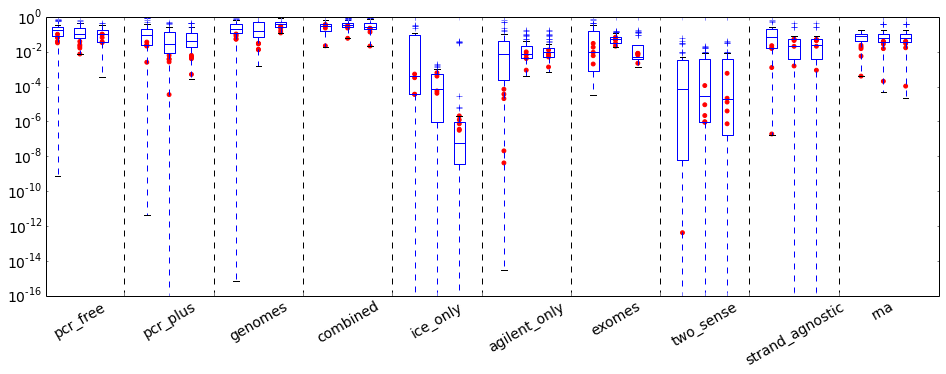

In [14]:
"1 - SENSITIVITY"
# unfiltered_exp_sens.shape

unf = full_unfiltered_exp_false_diffs_nt
fil = full_no_opticals_exp_false_diffs_nt
cln = full_cleaned_exp_false_diffs_nt

# data for overlaying EPA as dots
unf_dots = full_unfiltered_exp_false_diffs_nt.loc["Exact Pairs Affinity"]
fil_dots = full_no_opticals_exp_false_diffs_nt.loc["Exact Pairs Affinity"]
cln_dots = full_cleaned_exp_false_diffs_nt.loc["Exact Pairs Affinity"]

# stuff for plotting the markers
marker_size=15
al=1
jitter = np.column_stack(np.random.normal(0, 0.08, len(unf_dots.index))).T

# General info for arranging plot columns
datasets = unf.columns
n_subfigs = len(datasets)
# dividers = np.arange(0,(n_subfigs*6),6)
dividers = np.arange(0,4*len(datasets),4)

# X values for the EPA dots
print dividers
unf_offsets = dividers + 1
print unf_offsets
unf_x = [unf_offsets] * len(unf_dots.index)
# unf_x = unf_x + jitter
# print unf_x

fil_offsets = dividers + 2
fil_x = [fil_offsets] * len(fil_dots.index)
# fil_x = fil_x + jitter

cln_offsets = dividers + 3
cln_x = [cln_offsets] * len(cln_dots.index)
# cln_x = cln_x + jitter

fig = plt.figure(figsize=(16,5))
ax=plt.gca()

# Draw the box plots
# datasets=['pcr_free', 'pcr_plus']
full=[]
xlabs = []
for dset in datasets:
#     unf = np.log(unfiltered_exp_sens[dset].clip(10**-12, 1-10**-5))
#     fil = np.log(no_opticals_exp_sens_nt[dset].clip(10**-12, 1-10**-5))
#     cln = np.log(cleaned_exp_sens_nt[dset].clip(10**-12, 1-10**-5))
    
    unf = full_unfiltered_exp_false_diffs_nt[dset]
    fil = full_no_opticals_exp_false_diffs_nt[dset]
    cln = full_cleaned_exp_false_diffs_nt[dset]
    fullset = [unf, fil, cln, []]
    xlab = ["",dset,"",""]
    full += fullset
    xlabs += xlab
 
bp = ax.boxplot(full)
for median in bp['medians']:
#     median.set(color='#b2df8a', linewidth=2)
    median.set(color='b')

print unf_x

# Draw the EPA dots
ax.scatter(x=unf_x, y=unf_dots, c='r', s=marker_size, marker=mk.MarkerStyle.filled_markers[0], edgecolors='face', alpha=al)
ax.scatter(x=fil_x, y=fil_dots, c='r', s=marker_size, marker=mk.MarkerStyle.filled_markers[0], edgecolors='face', alpha=al)
ax.scatter(x=cln_x, y=cln_dots, c='r', s=marker_size, marker=mk.MarkerStyle.filled_markers[0], edgecolors='face', alpha=al)


# set the Y-axis limits
# ax.set_ylim((0.0, 1.1))
# ax.set_ylim((-10^(0), 0))
# ax.set_ylim(-0.05, 0.01)
ax.set_ylim(10**(-16), 10**0.01)

# start,end = ax.get_ylim()
# ytix = np.arange(start,end,0.00001)
# ax.set_yticks(ytix)

# Draw some nice dotted lines to visually dilineate our sets
for x_thing in dividers:
#     ax.plot([x_thing,x_thing], [0, 1.1], c='k', linestyle='--')
        ax.plot([x_thing,x_thing], [10**(-16), 10**1], c='k', linestyle='--')


# Format the dataset labels
ax.set_xticklabels(xlabs, rotation=30)
font_size=14
# ax.tick_params(which='minor', color='w', labelsize=font_size)
# ax.tick_params(which='major', labelsize=font_size)
ax.tick_params(which='major', color='w', labelsize=font_size)

# Set the Y-axis scale (log or linear)
ax.set_yscale("log", nonposy='mask')
# ax.set_yscale('linear')
# ax.set_yscale('symlog')

print

"1 - SENSITIVITY"

[ 0  4  8 12 16 20 24 28 32 36]
[ 1  5  9 13 17 21 25 29 33 37]
[array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]), array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]), array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]), array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37]), array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37])]



'1 - SPECIFICITY'

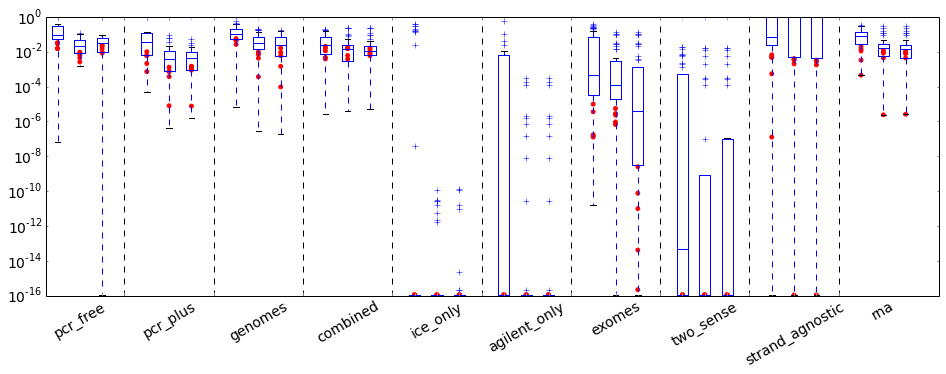

In [15]:

# unfiltered_exp_sens.shape

unf = full_unfiltered_exp_false_sames_nt
fil = full_no_opticals_exp_false_sames_nt
cln = full_cleaned_exp_false_sames_nt

# data for overlaying EPA as dots
unf_dots = full_unfiltered_exp_false_sames_nt.loc["Exact Pairs Affinity"]
fil_dots = full_no_opticals_exp_false_sames_nt.loc["Exact Pairs Affinity"]
cln_dots = full_cleaned_exp_false_sames_nt.loc["Exact Pairs Affinity"]

# stuff for plotting the markers
marker_size=15
al=1
jitter = np.column_stack(np.random.normal(0, 0.08, len(unf_dots.index))).T

# General info for arranging plot columns
datasets = unf.columns
n_subfigs = len(datasets)
# dividers = np.arange(0,(n_subfigs*6),6)
dividers = np.arange(0,4*len(datasets),4)

# X values for the EPA dots
print dividers
unf_offsets = dividers + 1
print unf_offsets
unf_x = [unf_offsets] * len(unf_dots.index)
# unf_x = unf_x + jitter
# print unf_x

fil_offsets = dividers + 2
fil_x = [fil_offsets] * len(fil_dots.index)
# fil_x = fil_x + jitter

cln_offsets = dividers + 3
cln_x = [cln_offsets] * len(cln_dots.index)
# cln_x = cln_x + jitter

fig = plt.figure(figsize=(16,5))
ax=plt.gca()

# Draw the box plots
# datasets=['pcr_free', 'pcr_plus']
full=[]
xlabs = []
for dset in datasets:
#     unf = np.log(unfiltered_exp_sens[dset].clip(10**-12, 1-10**-5))
#     fil = np.log(no_opticals_exp_sens_nt[dset].clip(10**-12, 1-10**-5))
#     cln = np.log(cleaned_exp_sens_nt[dset].clip(10**-12, 1-10**-5))
    
    unf = full_unfiltered_exp_false_sames_nt[dset]
    fil = full_no_opticals_exp_false_sames_nt[dset]
    cln = full_cleaned_exp_false_sames_nt[dset]
    fullset = [unf, fil, cln, []]
    xlab = ["",dset,"",""]
    full += fullset
    xlabs += xlab
 
bp = ax.boxplot(full)
for median in bp['medians']:
#     median.set(color='#b2df8a', linewidth=2)
    median.set(color='b')

print unf_x

# Draw the EPA dots
ax.scatter(x=unf_x, y=unf_dots, c='r', s=marker_size, marker=mk.MarkerStyle.filled_markers[0], edgecolors='face', alpha=al)
ax.scatter(x=fil_x, y=fil_dots, c='r', s=marker_size, marker=mk.MarkerStyle.filled_markers[0], edgecolors='face', alpha=al)
ax.scatter(x=cln_x, y=cln_dots, c='r', s=marker_size, marker=mk.MarkerStyle.filled_markers[0], edgecolors='face', alpha=al)


# set the Y-axis limits
# ax.set_ylim((0.0, 1.1))
# ax.set_ylim((-10^(0), 0))
# ax.set_ylim(-0.05, 0.01)
ax.set_ylim(10**(-16), 10**0.01)

# start,end = ax.get_ylim()
# ytix = np.arange(start,end,0.00001)
# ax.set_yticks(ytix)

# Draw some nice dotted lines to visually dilineate our sets
for x_thing in dividers:
#     ax.plot([x_thing,x_thing], [0, 1.1], c='k', linestyle='--')
        ax.plot([x_thing,x_thing], [10**(-16), 10**1], c='k', linestyle='--')


# Format the dataset labels
ax.set_xticklabels(xlabs, rotation=30)
font_size=14
# ax.tick_params(which='minor', color='w', labelsize=font_size)
# ax.tick_params(which='major', labelsize=font_size)
ax.tick_params(which='major', color='w', labelsize=font_size)


# Set the Y-axis scale (log or linear)
ax.set_yscale("log", nonposy='mask')
# ax.set_yscale('linear')
# ax.set_yscale('symlog')

print

"1 - SPECIFICITY"